In [108]:
library(quantmod)
library(tidyverse)

library(readxl)
library(lmtest) 
library(forecast)
library(DIMORA)

library(fpp2)

library(rugarch)
library(ggplot2)
library(PerformanceAnalytics)
library(xts)

library(sm)
library(splines)
library(gam)

library(tree)
library (gbm)

In [20]:
start_date <- Sys.Date()-(365*12)
end_date <- Sys.Date()
master_df <- NULL
stock_list <- c("CL=F")
for (idx in seq(length(stock_list))){
  stock_index = stock_list[idx]
  getSymbols(stock_index, verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly")
  temp_df = as.data.frame(get(stock_index))
  temp_df$Date = row.names(temp_df)
  temp_df$Index = stock_index
  row.names(temp_df) = NULL
  colnames(temp_df) = c("Open", "High", "Low", "Close", 
                        "Volume", "Adjusted", "Date", "Index")
  temp_df = temp_df[c("Date", "Index", "Open", "High", 
                      "Low", "Close", "Volume", "Adjusted")]
  master_df = rbind(master_df, temp_df)
}


write.csv(master_df,"crudeoilstats.csv", row.names = TRUE)





downloading  CL=F .....

done.


In [21]:
crudeoil <- read.csv("crudeoilstats.csv")
crudeoil <- na.omit(crudeoil)
str(crudeoil)

'data.frame':	122 obs. of  9 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date    : chr  "2011-02-01" "2011-03-01" "2011-04-01" "2011-06-01" ...
 $ Index   : chr  "CL=F" "CL=F" "CL=F" "CL=F" ...
 $ Open    : num  92.2 97 106.6 102.7 95.1 ...
 $ High    : num  103 107 114 103 101 ...
 $ Low     : num  83.8 96.2 105.3 89.6 93.4 ...
 $ Close   : num  97 106.7 113.9 95.4 95.7 ...
 $ Volume  : int  6702855 7142807 5906063 7612897 5712768 8623260 6687717 6923687 6546619 4905263 ...
 $ Adjusted: num  97 106.7 113.9 95.4 95.7 ...


In [22]:
crudeoil

,X,Date,Index,Open,High,Low,Close,Volume,Adjusted
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,2011-02-01,CL=F,92.20,103.41,83.85,96.97,6702855,96.97
2,2,2011-03-01,CL=F,96.97,106.95,96.22,106.72,7142807,106.72
3,3,2011-04-01,CL=F,106.62,114.18,105.31,113.93,5906063,113.93
4,4,2011-06-01,CL=F,102.68,103.31,89.61,95.42,7612897,95.42
5,5,2011-07-01,CL=F,95.12,100.62,93.45,95.70,5712768,95.70
6,6,2011-08-01,CL=F,96.20,98.60,75.71,88.81,8623260,88.81
7,7,2011-09-01,CL=F,88.73,90.52,77.11,79.20,6687717,79.20
8,8,2011-10-01,CL=F,78.92,94.65,74.95,93.19,6923687,93.19
9,9,2011-11-01,CL=F,92.58,103.37,89.17,100.36,6546619,100.36


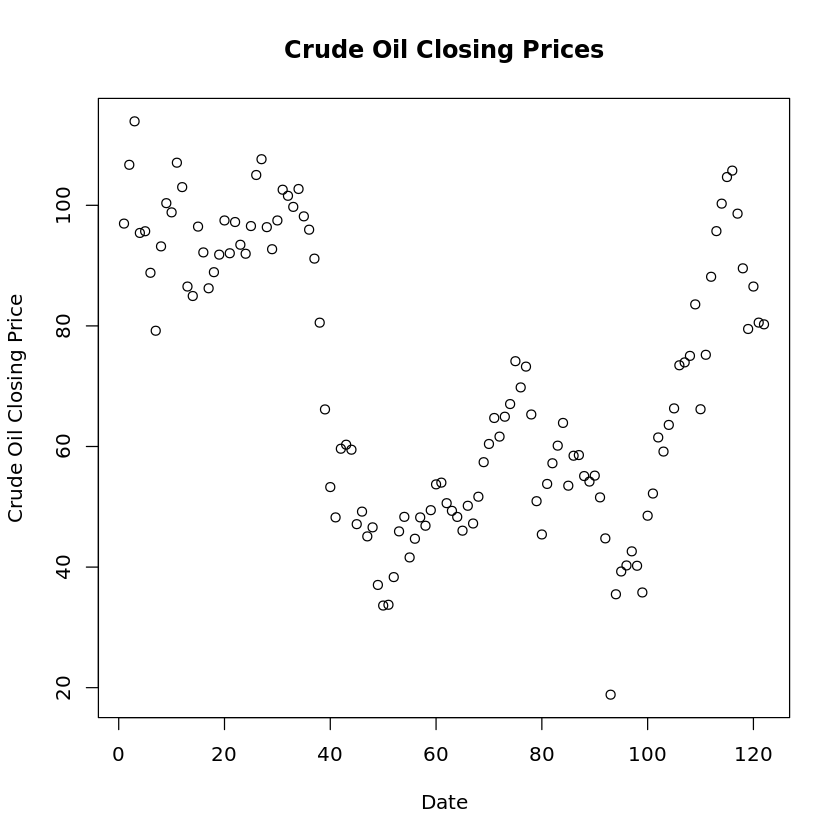

In [23]:
plot(crudeoil$Close, main = "Crude Oil Closing Prices", ylab="Crude Oil Closing Price", xlab="Date")

In [25]:
## transform the data into a ts object
close_co.ts <- ts(crudeoil$Close, frequency=12)
close_co.ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,96.97,106.72,113.93,95.42,95.70,88.81,79.20,93.19,100.36,98.83,107.07,103.02
2,86.53,84.96,96.47,92.19,86.24,88.91,91.82,97.49,92.05,97.23,93.46,91.97
3,96.56,105.03,107.65,96.38,92.72,97.49,102.59,101.58,99.74,102.71,98.17,95.96
4,91.16,80.54,66.15,53.27,48.24,59.63,60.30,59.47,47.12,49.20,45.09,46.59
5,37.04,33.62,33.75,38.34,45.92,48.33,41.60,44.70,48.24,46.86,49.44,53.72
6,54.01,50.60,49.33,48.32,46.04,50.17,47.23,51.67,57.40,60.42,64.73,61.64
7,64.94,67.04,74.15,69.80,73.25,65.31,50.93,45.41,53.79,57.22,60.14,63.91
8,53.50,58.47,58.58,55.10,54.18,55.17,51.56,44.76,18.84,35.49,39.27,40.27
9,42.61,40.22,35.79,48.52,52.20,61.50,59.16,63.58,66.32,73.47,73.95,75.03
10,83.57,66.18,75.21,88.15,95.72,100.28,104.69,105.76,98.62,89.55,79.49,86.53


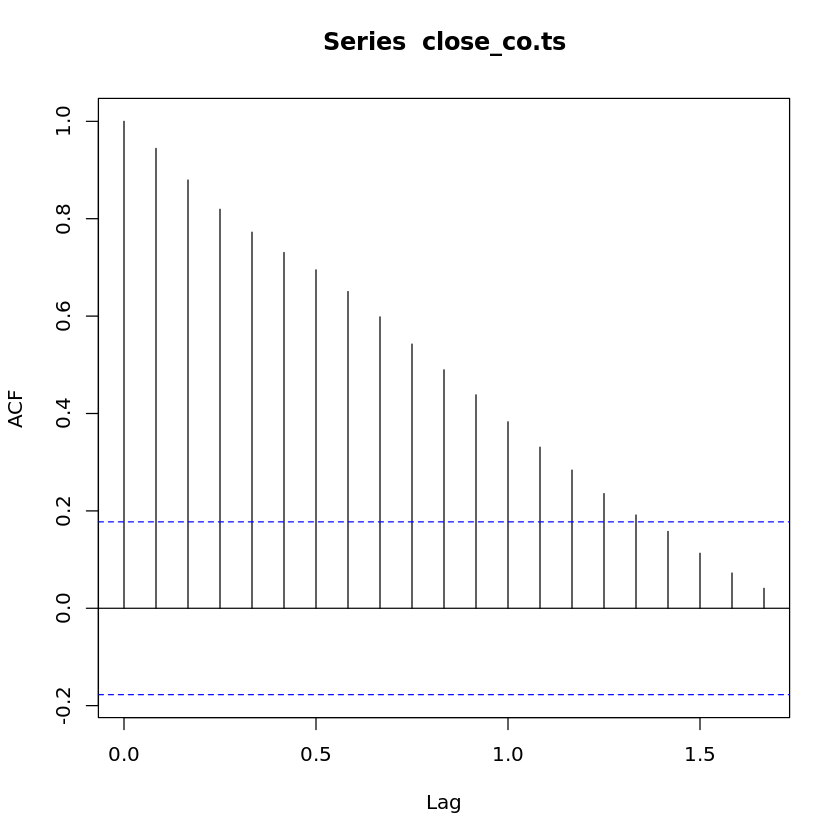

In [26]:
acf(close_co.ts)


Call:
lm(formula = crudeoil$Close ~ tt)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.408 -18.393  -0.306  16.490  49.430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.17582    3.83590  22.466  < 2e-16 ***
tt          -0.25729    0.05413  -4.754 5.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.05 on 120 degrees of freedom
Multiple R-squared:  0.1585,	Adjusted R-squared:  0.1515 
F-statistic:  22.6 on 1 and 120 DF,  p-value: 5.606e-06


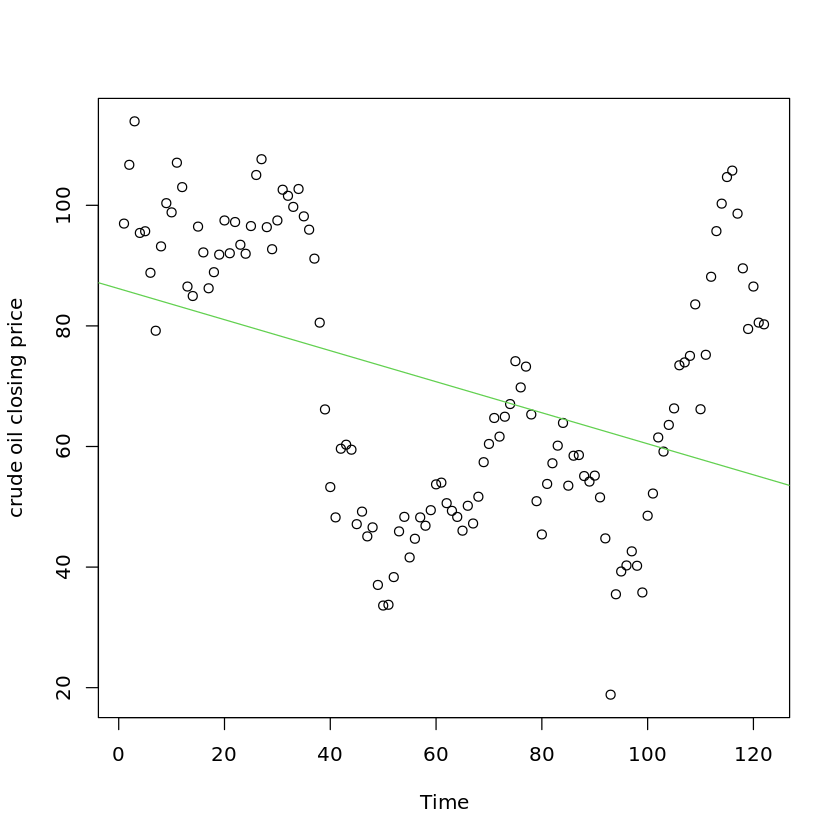

In [29]:
#fit linear regression
tt<- 1:NROW(crudeoil$Close) #create time variable
fit1<- lm(crudeoil$Close~ tt)
summary(fit1)

##plot the model
plot(tt, crudeoil$Close, xlab="Time", ylab="crude oil closing price")
abline(fit1, col=3)


	Durbin-Watson test

data:  fit1
DW = 0.11697, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


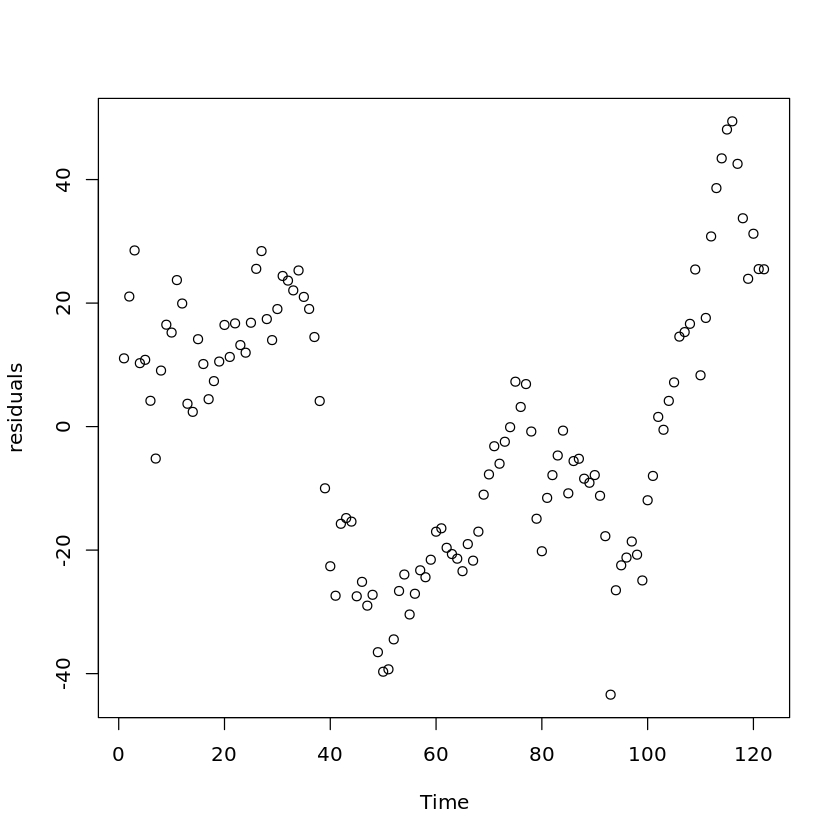

In [30]:
##check the residuals? are they autocorrelated? Test of DW
dwtest(fit1)

##check the residuals
resfit1<- residuals(fit1)
plot(resfit1,xlab="Time", ylab="residuals" )


Call:
tslm(formula = close_co.ts ~ trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.408 -18.393  -0.306  16.490  49.430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.17582    3.83590  22.466  < 2e-16 ***
trend       -0.25729    0.05413  -4.754 5.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.05 on 120 degrees of freedom
Multiple R-squared:  0.1585,	Adjusted R-squared:  0.1515 
F-statistic:  22.6 on 1 and 120 DF,  p-value: 5.606e-06



	Durbin-Watson test

data:  fitts
DW = 0.11697, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


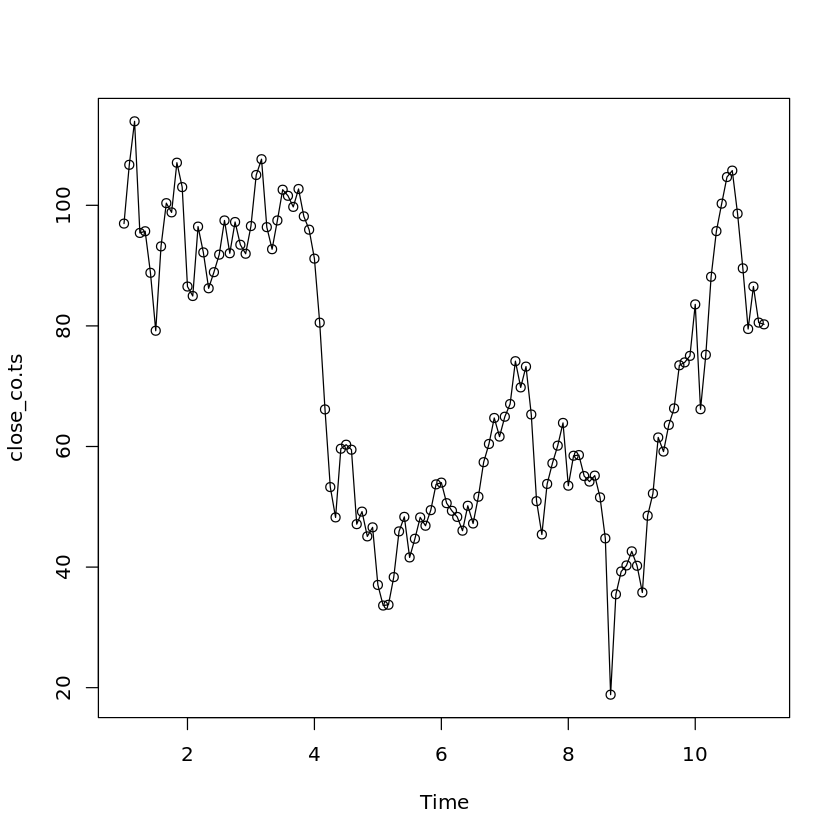

In [31]:
##let us do the same with a linear model for time series
ts.plot(close_co.ts, type="o")

## we fit a linear model with the tslm function
fitts<- tslm(close_co.ts~trend)

###obviously it gives the same results of the first model
summary(fitts)

dwtest(fitts)


Call:
tslm(formula = close_co.ts ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.621 -19.391   0.333  15.530  49.798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.41858    7.49034  11.671  < 2e-16 ***
trend       -0.25956    0.05678  -4.571 1.29e-05 ***
season2     -0.99499    9.39248  -0.106    0.916    
season3     -1.52269    9.62693  -0.158    0.875    
season4     -3.81513    9.62576  -0.396    0.693    
season5     -3.08357    9.62492  -0.320    0.749    
season6     -0.28501    9.62442  -0.030    0.976    
season7     -2.67746    9.62425  -0.278    0.781    
season8     -0.56490    9.62442  -0.059    0.953    
season9     -2.81834    9.62492  -0.293    0.770    
season10     0.29122    9.62576   0.030    0.976    
season11     0.53378    9.62693   0.055    0.956    
season12     1.57634    9.62844   0.164    0.870    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.0


	Durbin-Watson test

data:  fit2
DW = 0.10934, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


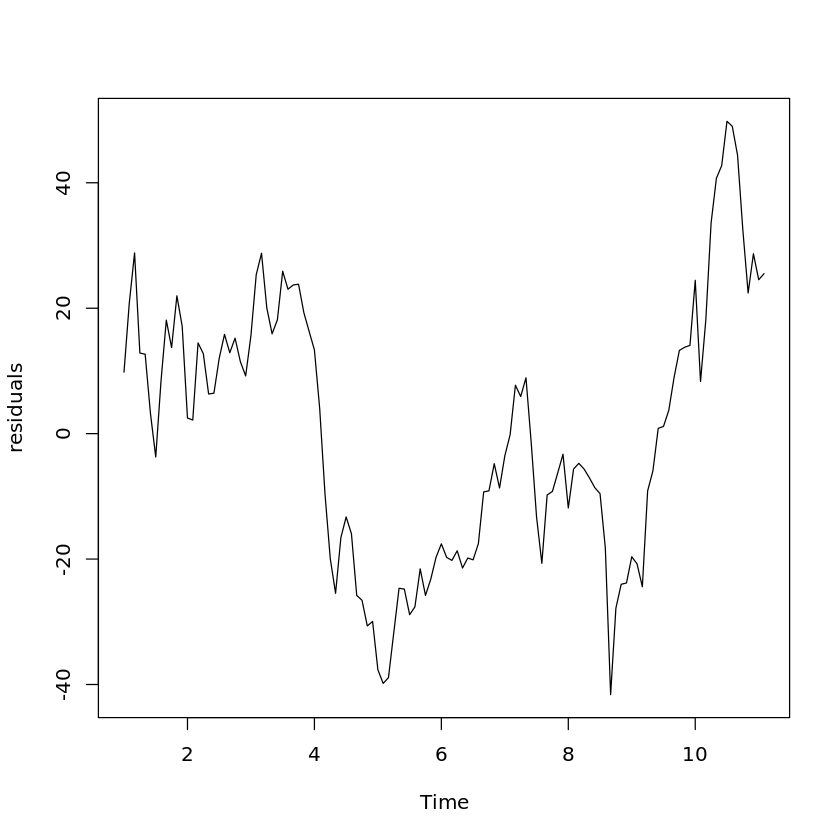

In [32]:
#Model with trend and seasonality
fit2 <- tslm(close_co.ts~ trend + season)
summary(fit2)

#check the residuals
res2 <- residuals(fit2)

plot(res2, ylab="residuals")
dwtest(fit2)

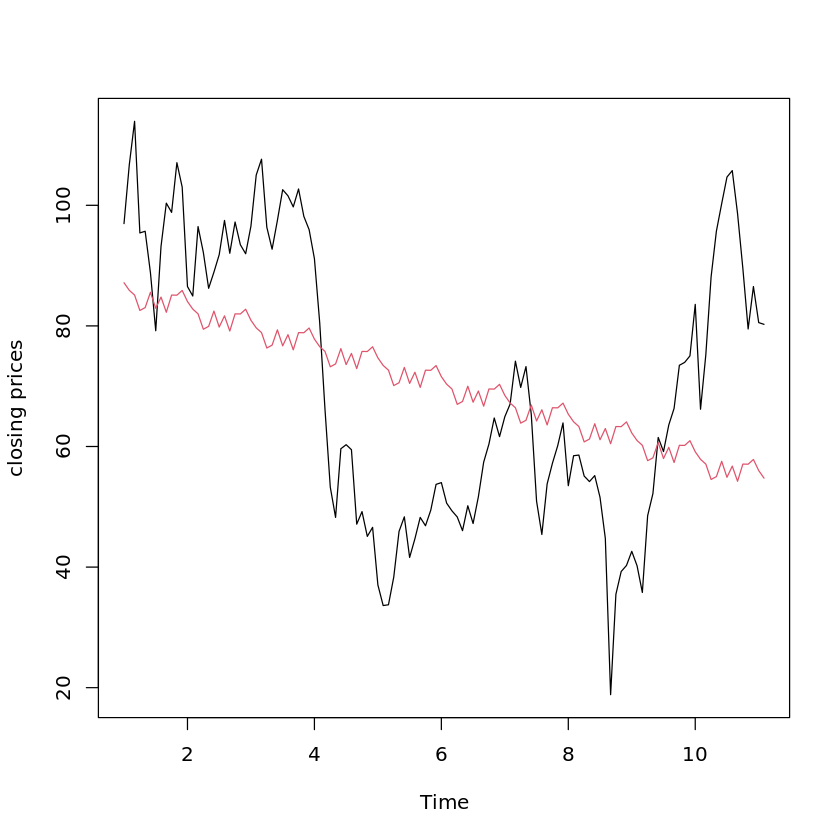

In [33]:
###plot of the model
plot(close_co.ts, ylab="closing prices", xlab="Time")
lines(fitted(fit2), col=2)

Call: ( Standard Bass Model )

  BM(series = close_cro, display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-126.670  -72.493  -34.009   -4.393   68.549  200.303 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 7.014594e+03 2.708772e+02 6.483684e+03 7.545503e+03 9.42e-40 ***
p 1.483590e-02 3.393703e-04 1.417075e-02 1.550106e-02 4.03e-56 ***
q 1.192332e-02 2.909567e-03 6.220668e-03 1.762596e-02 1.02e-04 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  93.28032  on  77  degrees of freedom
 Multiple R-squared:   0.9993682  Residual squared sum:  688940.4

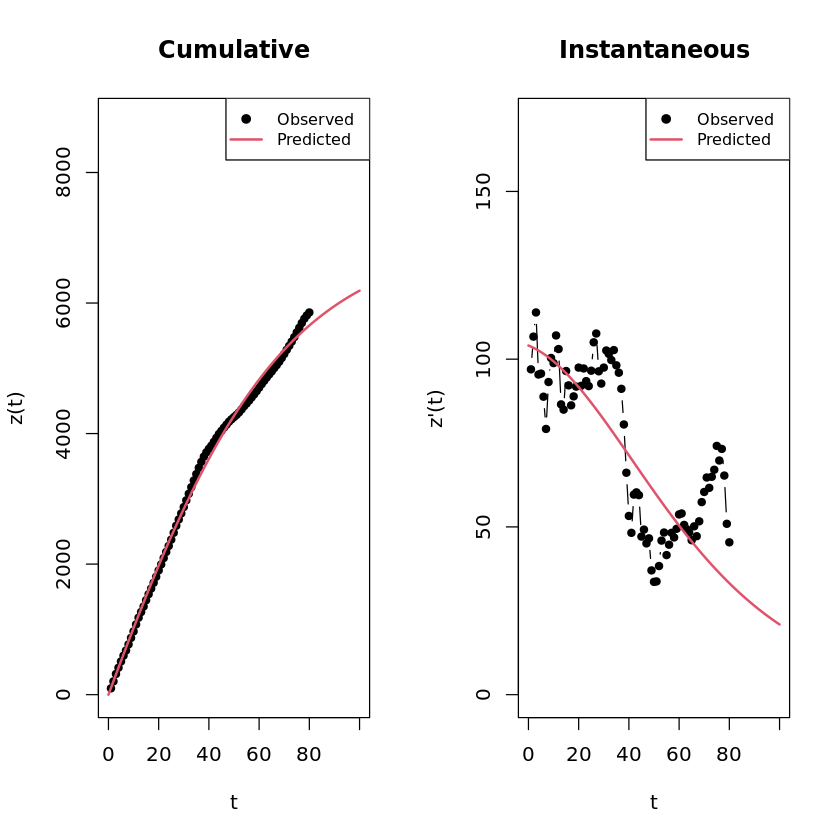

In [37]:
###we estimate a simple Bass Model 
close_cro<- crudeoil$Close[1:80]
bm<-BM(close_cro,display = T)
summary(bm)

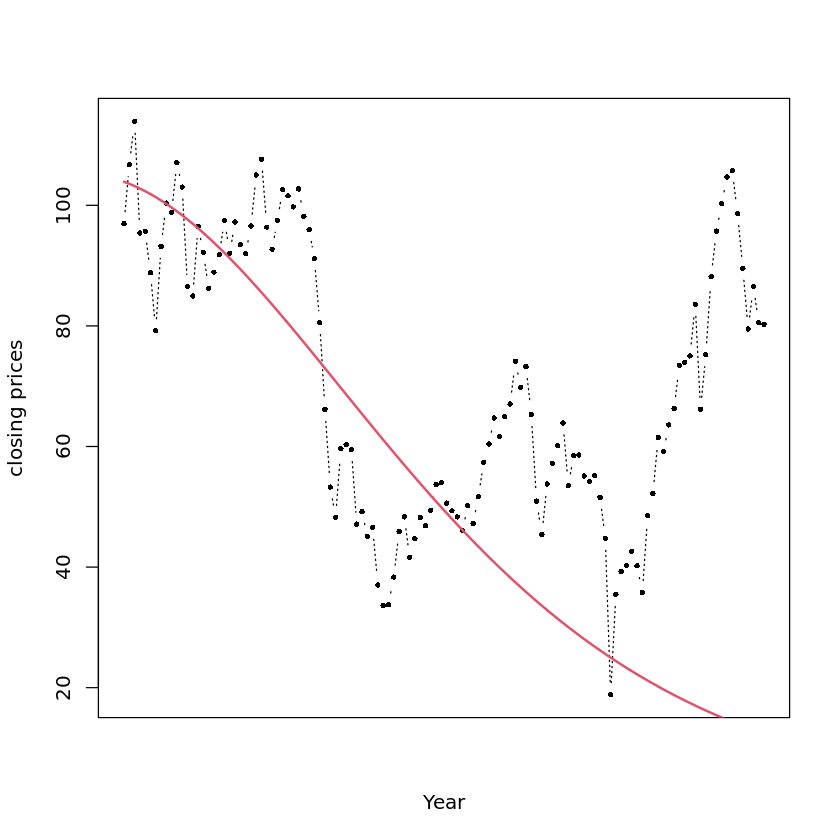

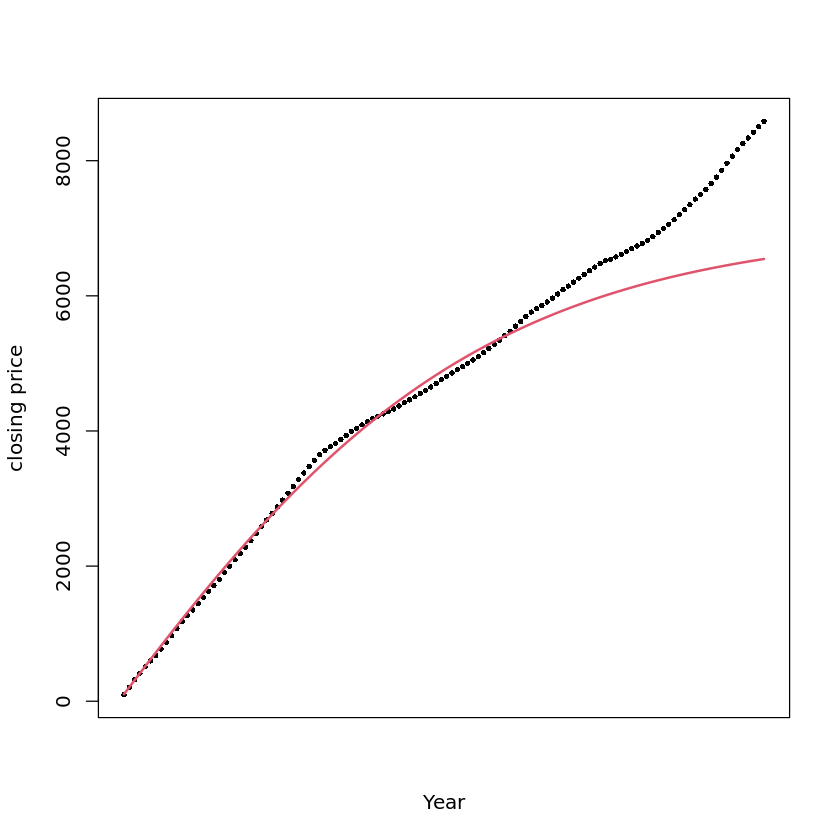

In [39]:
###prediction (out-of-sample)
pred_bm<- predict((bm), newx=c(1:122))
pred.inst<- make.instantaneous(pred_bm)

###plot of fitted model 
plot(crudeoil$Close, type= "b",xlab="Year", ylab="closing prices",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst, lwd=2, col=2)

plot(cumsum(crudeoil$Close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = close_cro, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-57.588 -13.940   3.632   2.607  18.096  30.173 

Coefficients:
       Estimate    Std.Error         Lower        Upper p-value  
m 4.106675e+04 2.120083e+05 -3.744620e+05 4.565955e+05   0.847  
p 2.346190e-03 1.227806e-02 -2.171837e-02 2.641075e-02   0.850  
q 2.082122e-03 1.442538e-02 -2.619109e-02 3.035534e-02   0.886  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  19.47792  on  37  degrees of freedom
 Multiple R-squared:   0.9999202  Residual squared sum:  15068.06

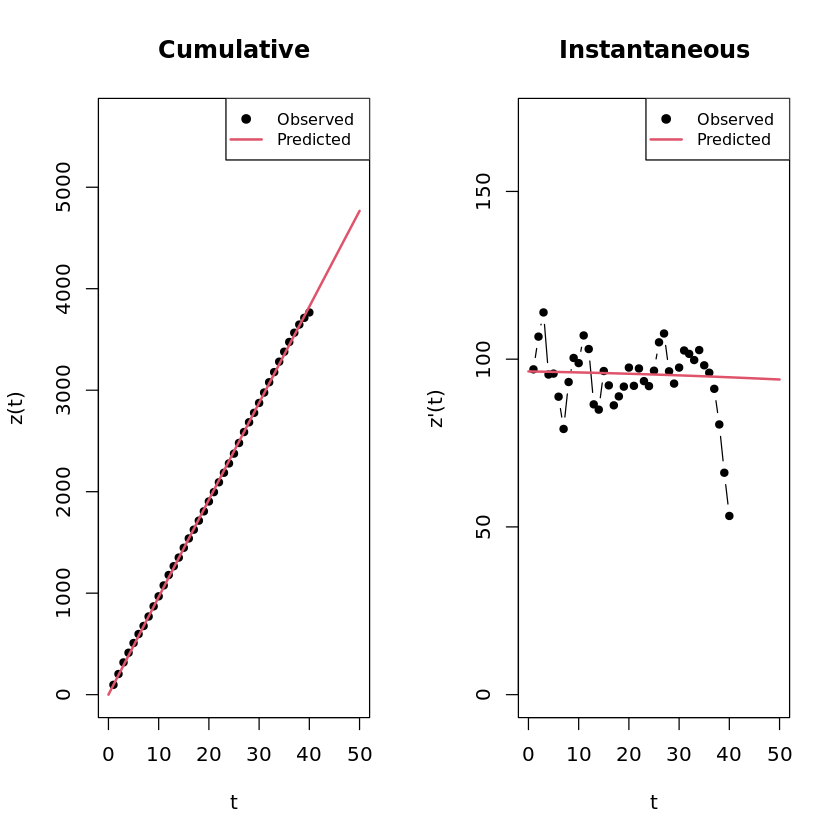

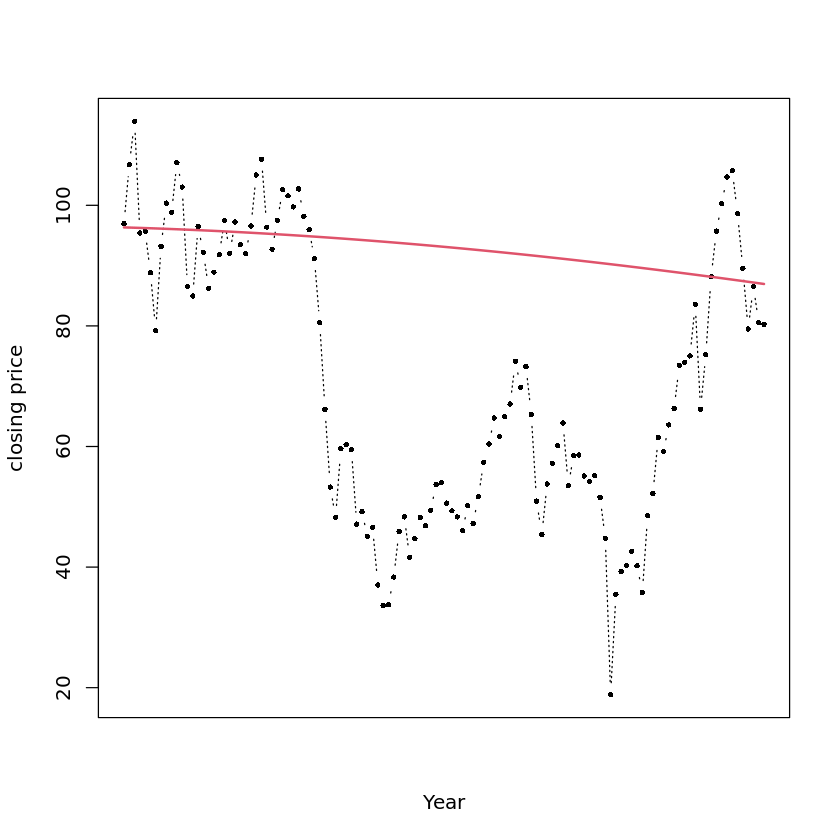

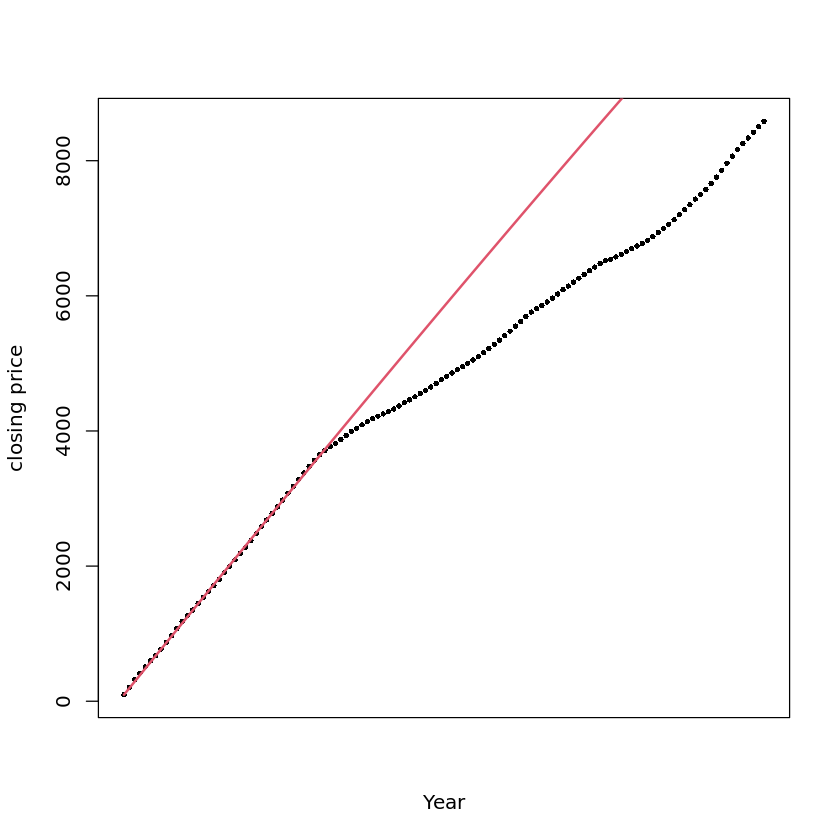

In [40]:
###we estimate the model with 50% of the data
close_cro<- crudeoil$Close[1:40]
bm_50<-BM(close_cro,display = T)
summary(bm_50)

pred_bm50<- predict(bm_50, newx=c(1:122))
pred.inst50<- make.instantaneous(pred_bm50)

plot(crudeoil$Close, type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst50, lwd=2, col=2)

plot(cumsum(crudeoil$Close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm50, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = close_cro, display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-17.1646  -3.7163   2.3004   0.8284   5.4715  17.9172 

Coefficients:
        Estimate    Std.Error         Lower        Upper p-value  
m  2.193553e+04 4.907292e+05 -9.398760e+05 9.837470e+05   0.965  
p  4.596622e-03 1.042547e-01 -1.997389e-01 2.089321e-01   0.965  
q -1.594583e-03 1.103049e-01 -2.177882e-01 2.145991e-01   0.989  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  9.513969  on  17  degrees of freedom
 Multiple R-squared:   0.9999243  Residual squared sum:  1733.52

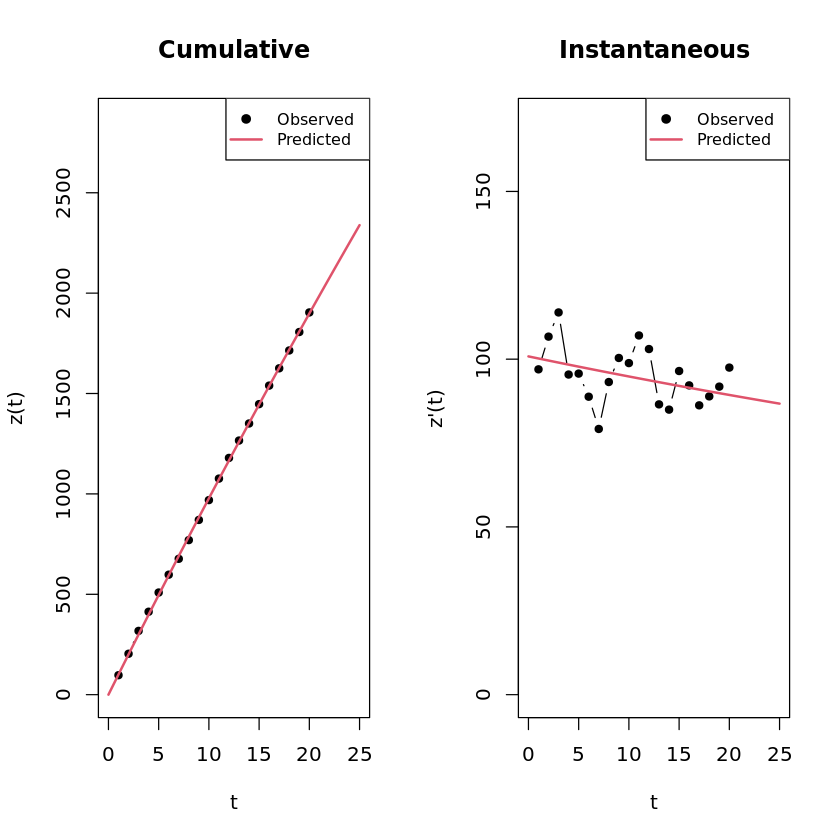

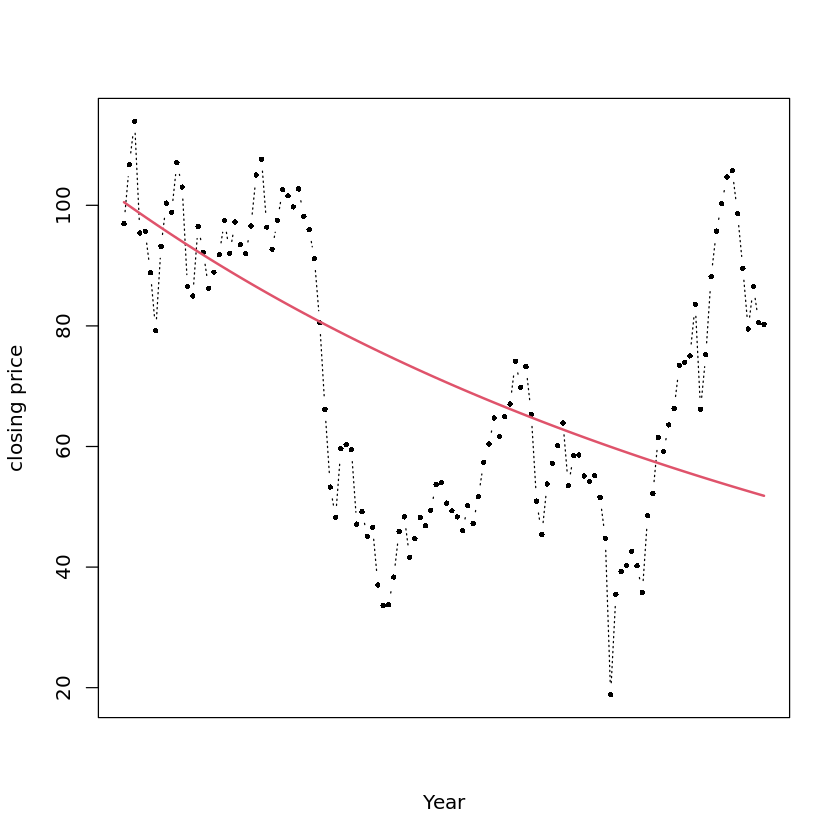

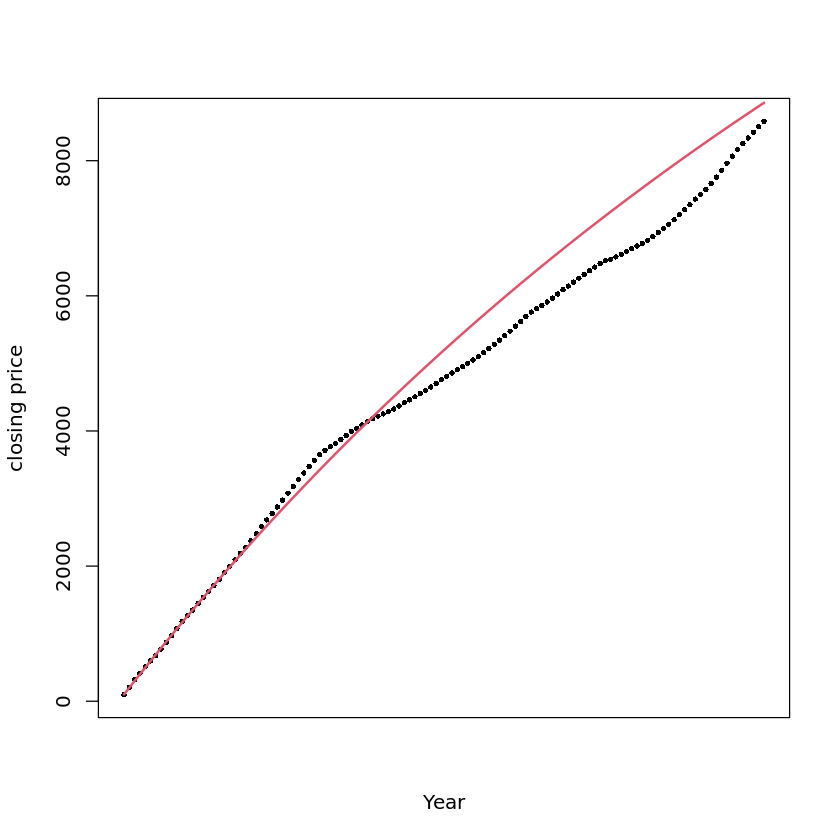

In [41]:
###we estimate the model with 25% of the data
close_cro<- crudeoil$Close[1:20]
bm_75<-BM(close_cro,display = T)
summary(bm_75)

pred_bm75<- predict(bm_75, newx=c(1:122))
pred.inst75<- make.instantaneous(pred_bm75)

plot(crudeoil$Close, type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst75, lwd=2, col=2)

plot(cumsum(crudeoil$Close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm75, lwd=2, col=2)

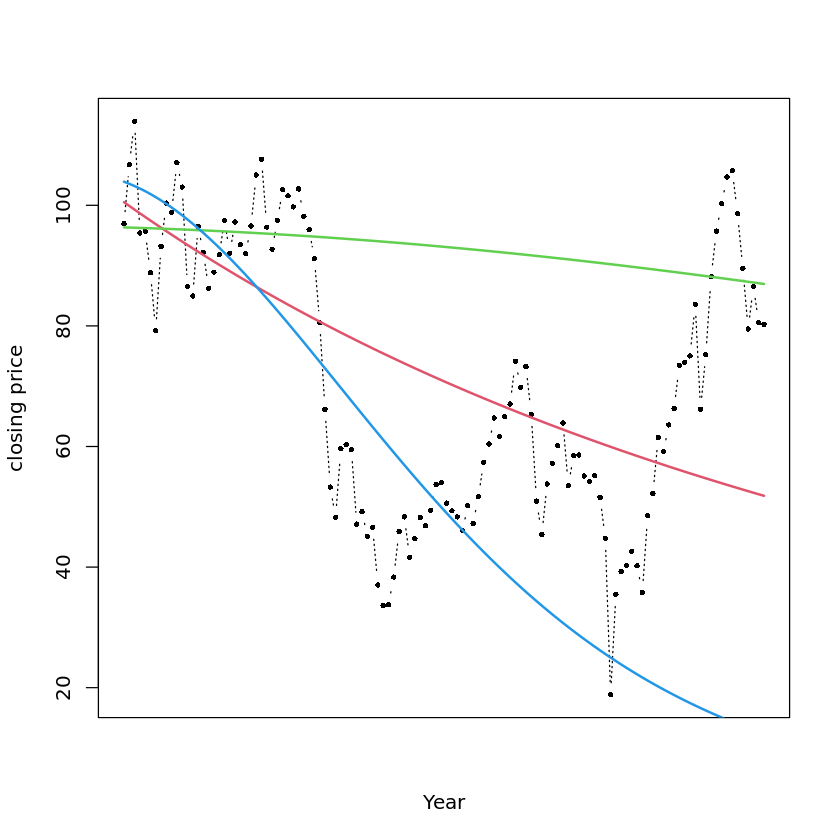

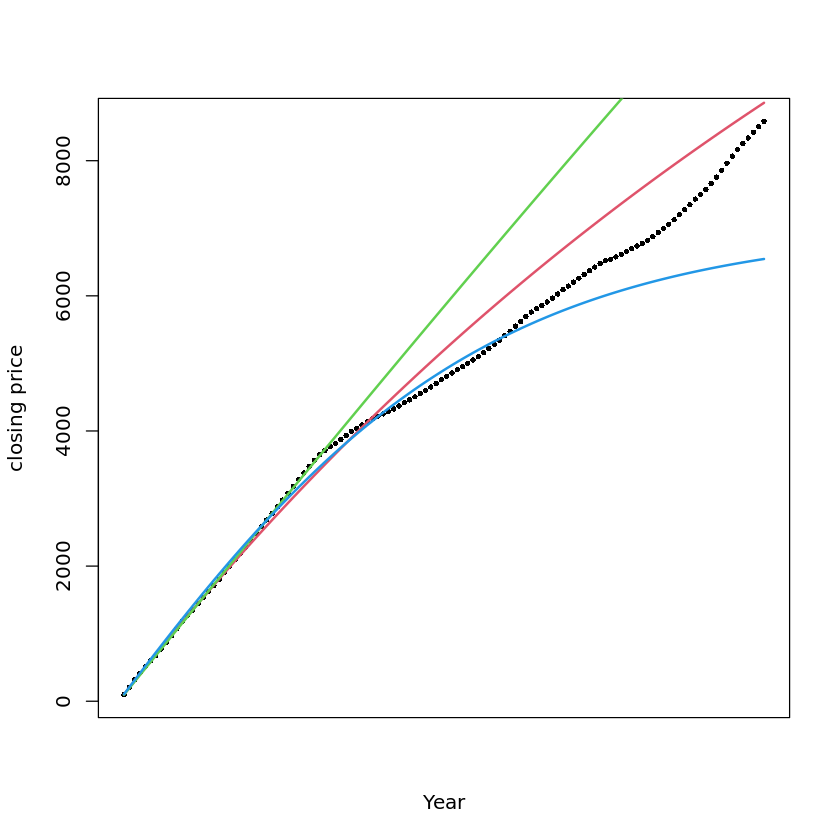

In [44]:
###Comparison between models (instantaneous)
###instantaneous
plot(crudeoil$Close, type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst75, lwd=2, col=2)
lines(pred.inst50, lwd=2, col=3)
lines(pred.inst, lwd=2, col=4)


###Comparison between models (cumulative)
plot(cumsum(crudeoil$Close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm75, lwd=2, col=2)
lines(pred_bm50, lwd=2, col=3)
lines(pred_bm, lwd=2, col=4)

Call: ( Generalized Bass model with 1  Rectangular  shock )

  GBM(series = crudeoil$Close, shock = "rett", nshock = 1, prelimestimates = c(21935.53, 
    0.004596622, -0.001594583, 26.80155, 40.25409, -0.4421487))

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-89.443 -22.718   5.998   1.500  31.282  78.871 

Coefficients:
           Estimate    Std.Error         Lower         Upper   p-value    
m     3.696453e+04 2.894916e+04 -1.977478e+04  9.370383e+04  2.04e-01    
p     2.579834e-03 1.983719e-03 -1.308183e-03  6.467851e-03  1.96e-01    
q     3.169489e-03 3.337252e-03 -3.371406e-03  9.710383e-03  3.44e-01    
a1    3.700000e+01 5.147080e-01  3.599119e+01  3.800881e+01  4.81e-98 ***
b1    1.077698e+02 6.112127e-01  1.065719e+02  1.089678e+02 8.77e-143 ***
c1   -4.517220e-01 1.088864e-02 -4.730634e-01 -4.303807e-01  2.01e-71 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  42.34934  on  116  degrees of freedom
 Multip

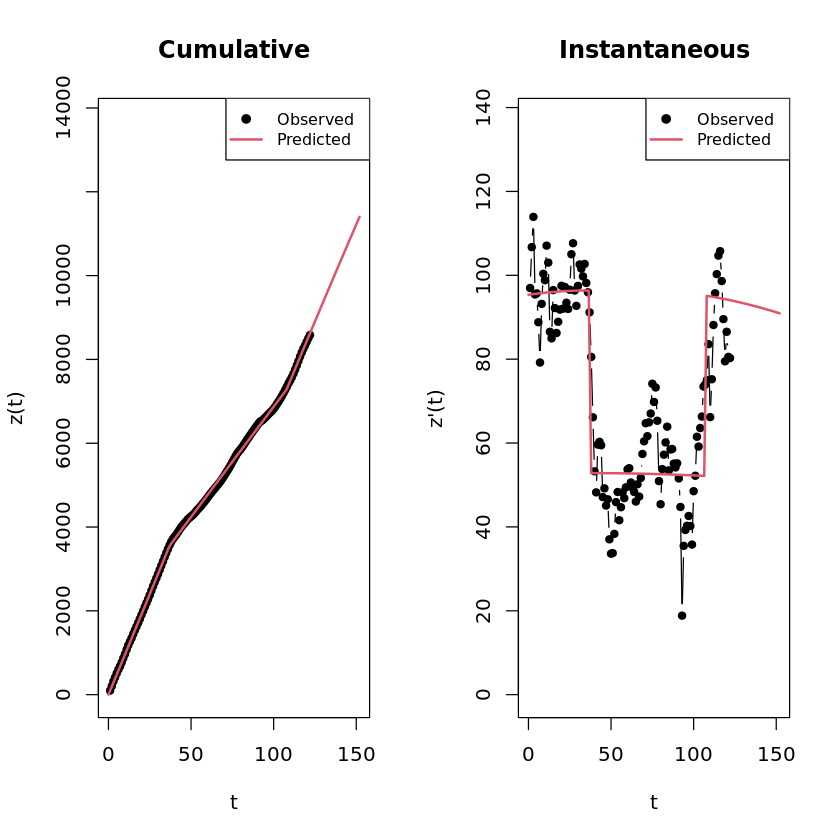

Call: ( Generalized Bass model with 1  Exponential  shock )

  GBM(series = crudeoil$Close, shock = "exp", nshock = 1, prelimestimates = c(21935.53, 
    0.004596622, -0.001594583, 9.675698, 0.03885826, 2.191083))

Residuals:
      Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-135.0459  -58.0136    0.5248    3.9322   66.8720  179.9520 

Coefficients:
           Estimate    Std.Error         Lower         Upper  p-value    
m     5.566088e+04 5.650231e+04 -5.508162e+04  1.664034e+05 3.27e-01    
p     1.533153e-05 1.970171e-05 -2.328312e-05  5.394618e-05 4.38e-01    
q     9.896679e-03 1.578587e-03  6.802705e-03  1.299065e-02 6.41e-09 ***
a1   -3.803129e+00 3.621415e+00 -1.090097e+01  3.294713e+00 2.96e-01    
b1   -7.990088e-02 5.069274e-03 -8.983648e-02 -6.996529e-02 1.30e-30 ***
c1    2.856916e+01 1.118475e+01  6.647450e+00  5.049088e+01 1.19e-02   *
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  78.96222  on  116  degrees of

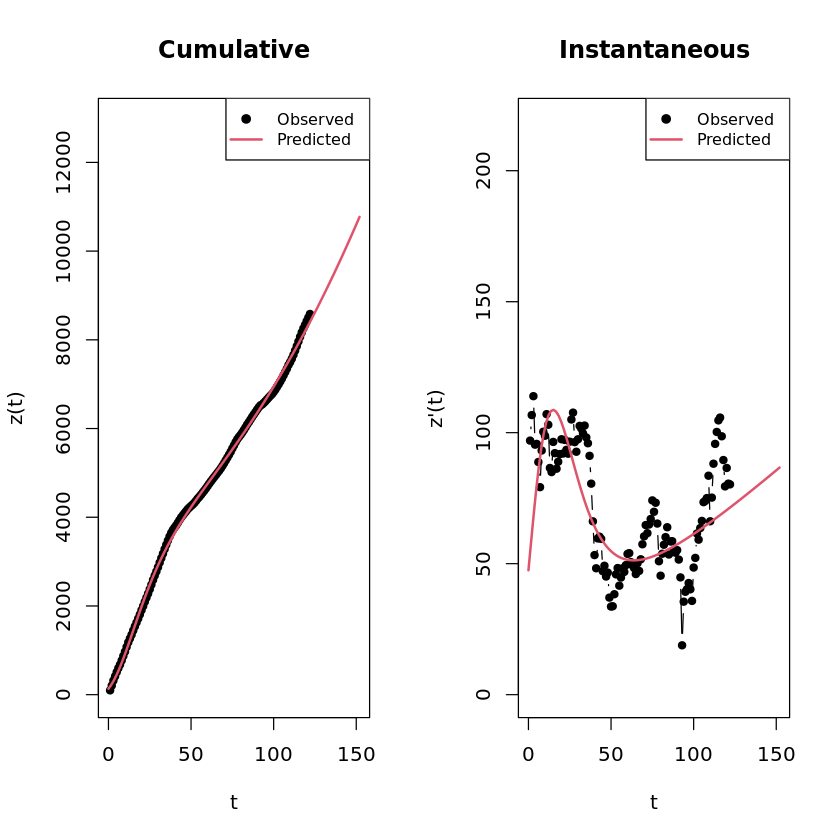

Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”


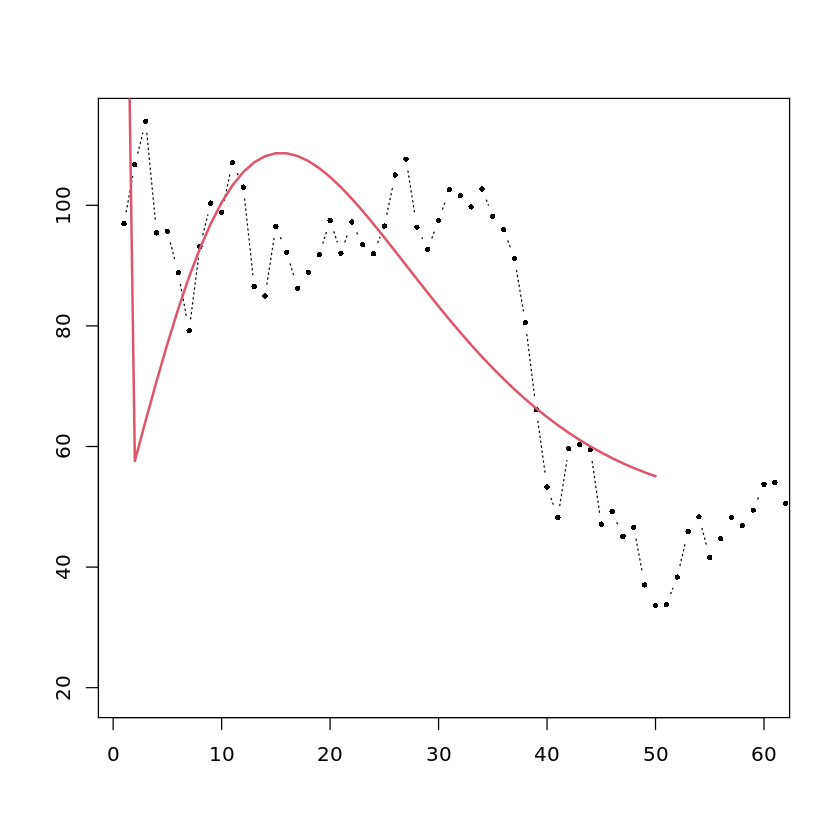

Call: ( Guseo Guidolin Model )

  GGM(series = crudeoil$Close, prelimestimates = c(21935.53, 0.004596622, 
    -0.001594583, 0.00240357, -0.01066601))

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-217.895 -139.816   -3.447   12.049  129.516  570.984 

Coefficients:
           Estimate    Std.Error         Lower        Upper p-value  
K     1.226512e+05 4.498279e+07 -8.804200e+07 8.828730e+07   0.998  
pc    2.932352e-02 2.080363e+01 -4.074504e+01 4.080369e+01   0.999  
qc   -8.994401e-01 1.242571e+01 -2.525338e+01 2.345450e+01   0.942  
ps    4.645721e-03 4.899350e-01 -9.556093e-01 9.649007e-01   0.992  
qs   -4.643236e-03 4.896375e-01 -9.643151e-01 9.550287e-01   0.992  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  184.9295  on  117  degrees of freedom
 Multiple R-squared:   0.9933149  Residual squared sum:  4155782

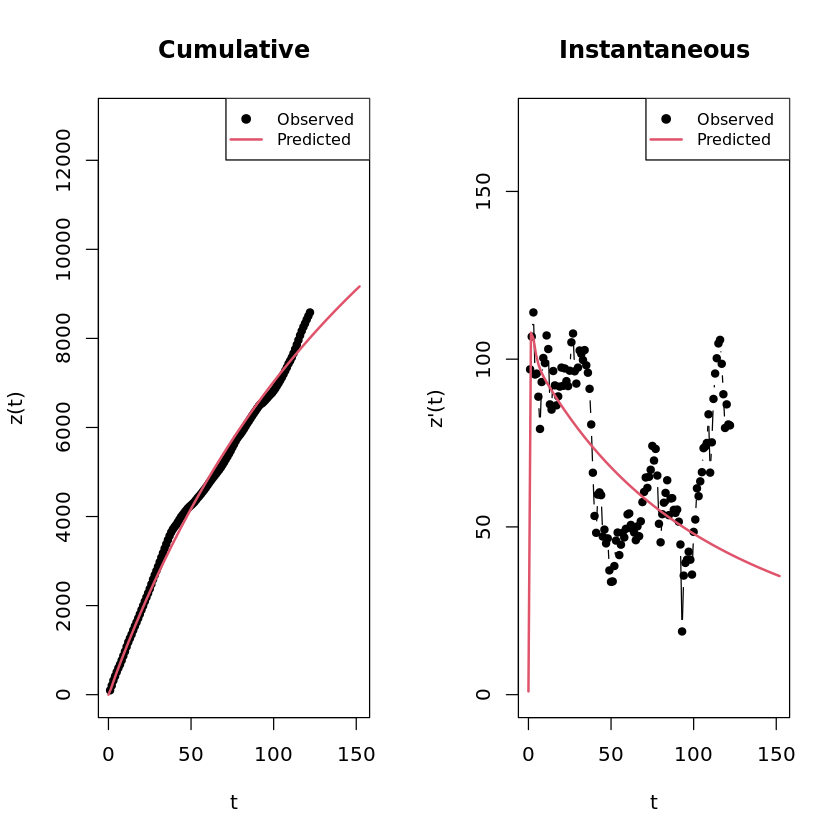

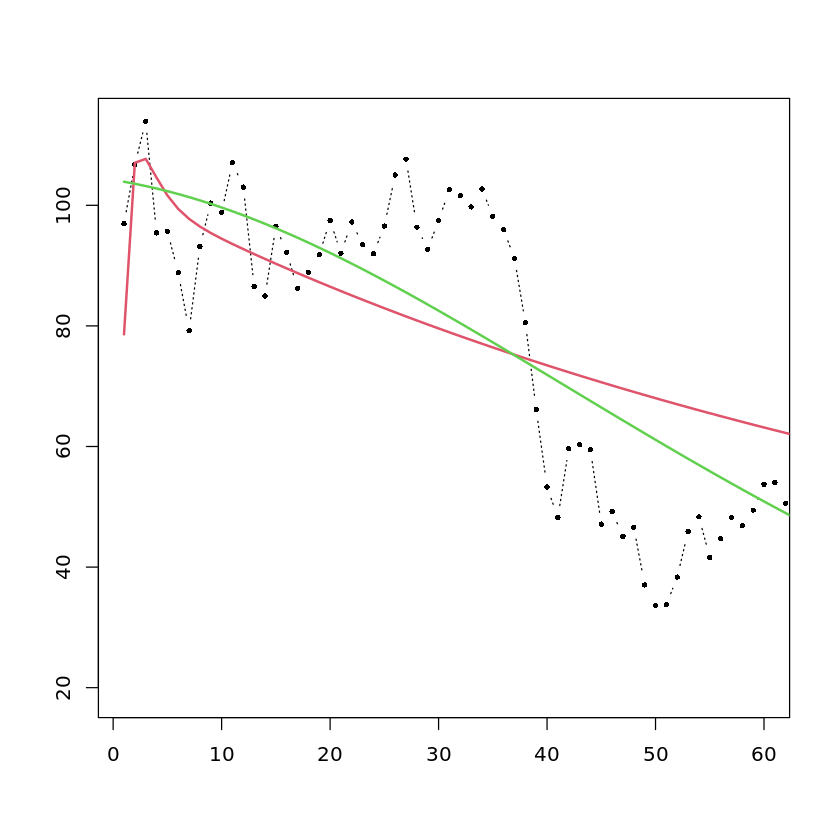

In [47]:
###GBMr1  
#25% of data
GBMr1<- GBM(crudeoil$Close,shock = "rett",nshock = 1,prelimestimates = c(2.193553e+04,4.596622e-03,-1.594583e-03, 2.680155e+01,4.025409e+01,-4.421487e-01))
summary(GBMr1)

######GBMe1

GBMe1<- GBM(crudeoil$Close,shock = "exp",nshock = 1,prelimestimates = c(2.193553e+04,4.596622e-03,-1.594583e-03, 9.675698e+00,3.885826e-02,2.191083e+00))
summary(GBMe1)

pred_GBMe1<- predict(GBMe1, newx=c(1:50))
pred_GBMe1.inst<- make.instantaneous(pred_GBMe1)

plot(crudeoil$Close, type= "b",xlab="", ylab="",  pch=16, lty=3, cex=0.6, xlim=c(1,60))
lines(pred_GBMe1.inst, lwd=2, col=2)


######GGM 
GGM<- GGM(crudeoil$Close, prelimestimates=c(2.193553e+04,4.596622e-03,-1.594583e-03,2.403570e-03,-1.066601e-02))
summary(GGM)

pred_GGM<- predict(GGM, newx=c(1:122))
pred_GGM.inst<- make.instantaneous(pred_GGM)

plot(crudeoil$Close, type= "b",xlab="", ylab="",  pch=16, lty=3, cex=0.6, xlim=c(1,60))
lines(pred_GGM.inst, lwd=2, col=2)
lines(pred.inst, lwd=2, col=3)


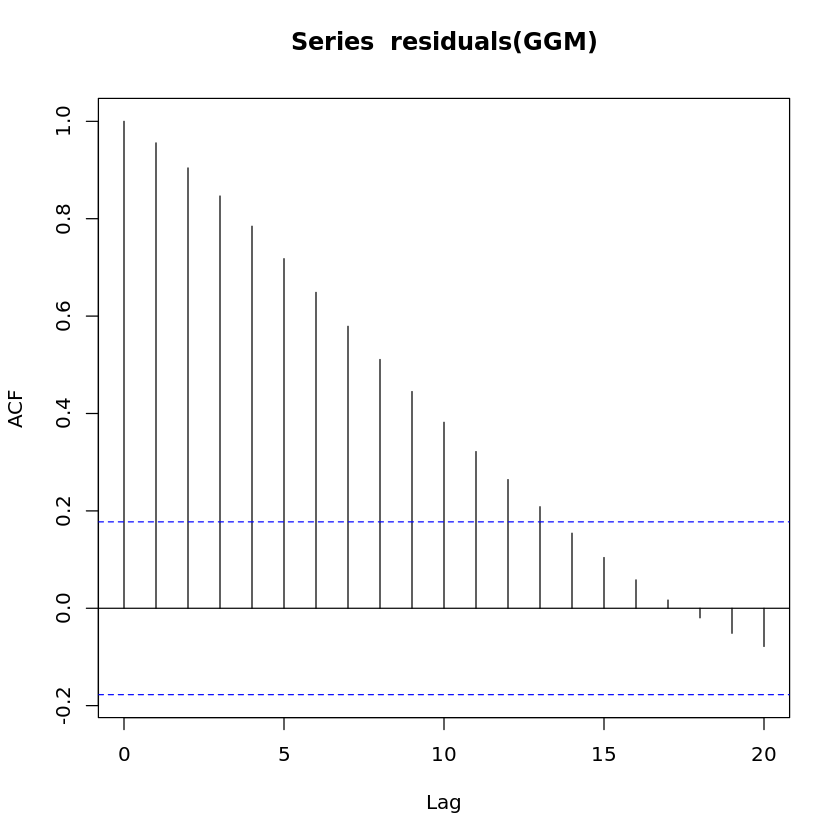

In [48]:
###Analysis of residuals
res_GGM<- residuals(GGM)
acf<- acf(residuals(GGM))


fit_GGM<- fitted(GGM)
fit_GGM_inst<- make.instantaneous(fit_GGM)

In [49]:
stock_list <- c("BZ=F")
master_df <- NULL

for (idx in seq(length(stock_list))){
  stock_index = stock_list[idx]
  getSymbols(stock_index, verbose = TRUE, src = "yahoo", return.class="ts",
             from=start_date,to=end_date, periodicity="monthly")
  temp_df = as.data.frame(get(stock_index))
  temp_df$Date = row.names(temp_df)
  temp_df$Index = stock_index
  row.names(temp_df) = NULL
  colnames(temp_df) = c("Open", "High", "Low", "Close", 
                        "Volume", "Adjusted", "Date", "Index")
  temp_df = temp_df[c("Date", "Index", "Open", "High", 
                      "Low", "Close", "Volume", "Adjusted")]
  master_df = rbind(master_df, temp_df)
}
write.csv(master_df,"brentstats.csv", row.names = TRUE)

downloading  BZ=F .....

done.


In [50]:
brent<- read.csv("brentstats.csv")
brent<- na.omit(brent)
str(brent)

'data.frame':	122 obs. of  9 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Index   : chr  "BZ=F" "BZ=F" "BZ=F" "BZ=F" ...
 $ Open    : num  100 112 118 116 111 ...
 $ High    : num  118 118 127 121 120 ...
 $ Low     : num  97.6 108.1 116.8 102.4 109.9 ...
 $ Close   : num  112 117 126 112 117 ...
 $ Volume  : int  27851 28970 18795 19525 12092 26360 17587 23438 21533 11389 ...
 $ Adjusted: num  112 117 126 112 117 ...


In [51]:
brent

,X,Date,Index,Open,High,Low,Close,Volume,Adjusted
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,1,BZ=F,100.49,118.03,97.56,111.80,27851,111.80
2,2,2,BZ=F,112.37,117.90,108.08,117.36,28970,117.36
3,3,3,BZ=F,117.79,127.30,116.84,125.89,18795,125.89
4,4,4,BZ=F,115.97,120.71,102.40,112.48,19525,112.48
5,5,5,BZ=F,110.58,119.79,109.94,116.74,12092,116.74
6,6,6,BZ=F,118.09,119.95,99.06,114.85,26360,114.85
7,7,7,BZ=F,114.08,116.49,101.83,102.76,17587,102.76
8,8,8,BZ=F,101.85,114.74,99.38,109.56,23438,109.56
9,9,9,BZ=F,109.25,116.43,106.86,110.82,21533,110.82


In [52]:
vol_br <- brent$Volume
vol_br
vol_br.ts <- ts(vol_br, frequency= 12)
vol_br.ts

[1]   27851   28970   18795   19525   12092   26360   17587   23438   21533
 [10]   11389   19706   16066   30755   24672   51785   20305   14189   12207
 [19]   14792   53584   67751   60668   94354  104092  107914  116013  122873
 [28]  140426  124853  100915   86747  114706  119769  155344  232563  208115
 [37]  267960  385099  305879  332585  576923  427435  415701  466769  657400
 [46]  635057  497093  482401  596999  725957  683434  574821  605361  543857
 [55]  493196  566263  505286  575861  806223  656427  555947  692804  546946
 [64]  769381  657977  459431  719378  477658  558759  472859  465261  567268
 [73]  645241  654964  684888  402979  457907  781961  738706  649077  684409
 [82]  559896  695425  823195 1047307  896145  718062  806410  808581  572198
 [91]  850898  725258  818304  528396  581247  443021  405942  483298  609695
[100]  528154  586185  611358  774197  703921  547723  669981  775897  590970
[109]  821979  832636  646880  619239  732123  531264  311730  447644  430112
[118]  465973  470730  619846  526954  448938

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,27851,28970,18795,19525,12092,26360,17587,23438,21533,11389,19706,16066
2,30755,24672,51785,20305,14189,12207,14792,53584,67751,60668,94354,104092
3,107914,116013,122873,140426,124853,100915,86747,114706,119769,155344,232563,208115
4,267960,385099,305879,332585,576923,427435,415701,466769,657400,635057,497093,482401
5,596999,725957,683434,574821,605361,543857,493196,566263,505286,575861,806223,656427
6,555947,692804,546946,769381,657977,459431,719378,477658,558759,472859,465261,567268
7,645241,654964,684888,402979,457907,781961,738706,649077,684409,559896,695425,823195
8,1047307,896145,718062,806410,808581,572198,850898,725258,818304,528396,581247,443021
9,405942,483298,609695,528154,586185,611358,774197,703921,547723,669981,775897,590970
10,821979,832636,646880,619239,732123,531264,311730,447644,430112,465973,470730,619846


In [53]:
close_br <- brent$Close
close_br
close_br.ts <- ts(close_br, frequency= 12)
close_br.ts

[1] 111.80 117.36 125.89 112.48 116.74 114.85 102.76 109.56 110.82 107.38
 [11] 122.66 122.88 101.87  97.80 114.57 112.39 108.70 111.23 111.11 115.55
 [21] 111.38 110.02 102.37 100.39 102.16 107.70 114.01 108.84 109.69 106.40
 [31] 109.07 107.76 108.07 109.41 106.02 103.19  94.67  85.86  70.15  57.33
 [41]  52.99  66.78  65.56  63.59  52.21  54.15  48.37  49.56  37.28  34.74
 [51]  35.97  39.60  48.13  49.68  42.46  47.04  49.06  48.30  50.47  56.13
 [61]  55.59  52.83  51.73  50.31  47.92  52.65  52.38  57.54  63.57  66.60
 [71]  69.05  65.78  70.27  77.59  79.44  77.42  82.72  75.47  58.71  52.28
 [81]  61.89  66.03  68.39  72.80  64.49  66.55  65.17  60.43  60.23  62.43
 [91]  58.16  50.52  25.27  35.33  41.15  43.30  45.10  40.95  37.46  51.34
[101]  55.88  66.13  63.54  67.25  69.63  75.13  76.33  78.52  84.38  70.57
[111]  79.20  91.21 100.99 107.91 109.34 114.81 110.01  96.49  87.96  94.83
[121]  85.43  85.91

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,111.80,117.36,125.89,112.48,116.74,114.85,102.76,109.56,110.82,107.38,122.66,122.88
2,101.87,97.80,114.57,112.39,108.70,111.23,111.11,115.55,111.38,110.02,102.37,100.39
3,102.16,107.70,114.01,108.84,109.69,106.40,109.07,107.76,108.07,109.41,106.02,103.19
4,94.67,85.86,70.15,57.33,52.99,66.78,65.56,63.59,52.21,54.15,48.37,49.56
5,37.28,34.74,35.97,39.60,48.13,49.68,42.46,47.04,49.06,48.30,50.47,56.13
6,55.59,52.83,51.73,50.31,47.92,52.65,52.38,57.54,63.57,66.60,69.05,65.78
7,70.27,77.59,79.44,77.42,82.72,75.47,58.71,52.28,61.89,66.03,68.39,72.80
8,64.49,66.55,65.17,60.43,60.23,62.43,58.16,50.52,25.27,35.33,41.15,43.30
9,45.10,40.95,37.46,51.34,55.88,66.13,63.54,67.25,69.63,75.13,76.33,78.52
10,84.38,70.57,79.20,91.21,100.99,107.91,109.34,114.81,110.01,96.49,87.96,94.83


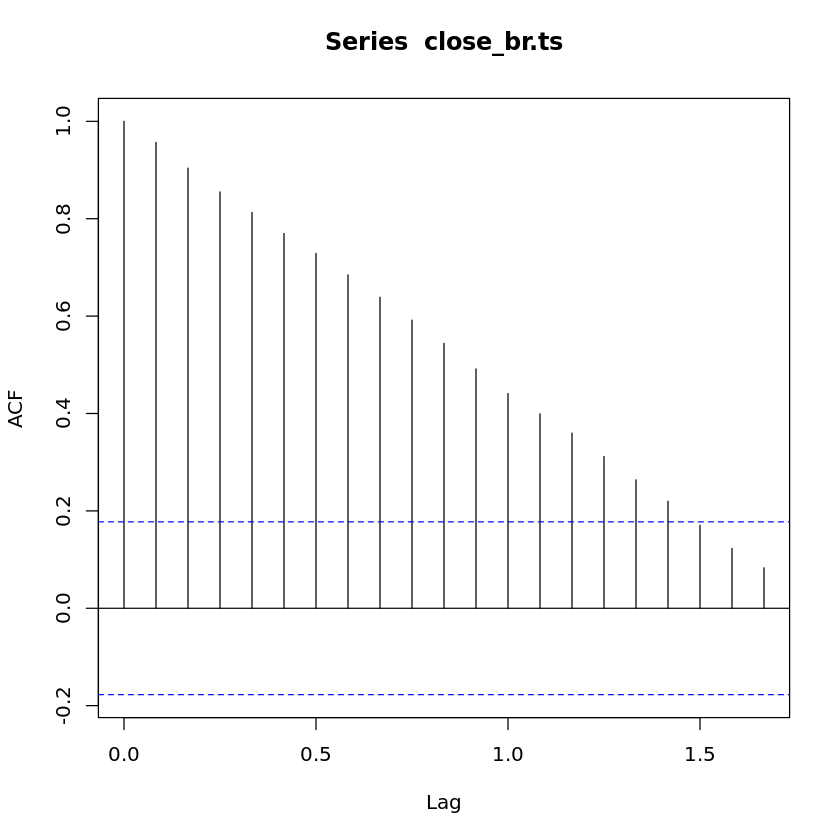

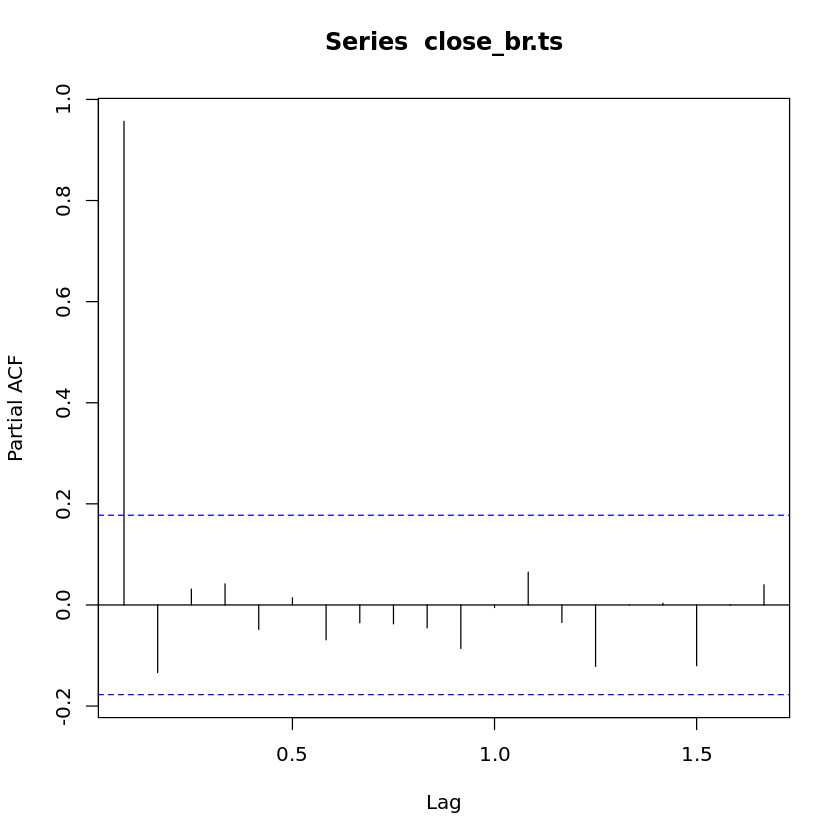

In [54]:
acf(close_br.ts)
pacf(close_br.ts)

In [55]:
brent1<- window(close_br.ts, start=4, end=11 +.9)
brent1

Warning message in window.default(x, ...):
“'end' value not changed”


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,94.67,85.86,70.15,57.33,52.99,66.78,65.56,63.59,52.21,54.15,48.37,49.56
5,37.28,34.74,35.97,39.60,48.13,49.68,42.46,47.04,49.06,48.30,50.47,56.13
6,55.59,52.83,51.73,50.31,47.92,52.65,52.38,57.54,63.57,66.60,69.05,65.78
7,70.27,77.59,79.44,77.42,82.72,75.47,58.71,52.28,61.89,66.03,68.39,72.80
8,64.49,66.55,65.17,60.43,60.23,62.43,58.16,50.52,25.27,35.33,41.15,43.30
9,45.10,40.95,37.46,51.34,55.88,66.13,63.54,67.25,69.63,75.13,76.33,78.52
10,84.38,70.57,79.20,91.21,100.99,107.91,109.34,114.81,110.01,96.49,87.96,94.83
11,85.43,85.91,,,,,,,,,,



Call:
tslm(formula = brent1 ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.905  -9.960  -0.874   7.713  43.313 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.98121    7.05942   7.222 4.03e-10 ***
trend        0.37605    0.07702   4.882 5.99e-06 ***
season2     -3.15229    8.81703  -0.358    0.722    
season3     -5.77277    9.13134  -0.632    0.529    
season4     -4.93168    9.12907  -0.540    0.591    
season5     -2.27630    9.12744  -0.249    0.804    
season6      1.94623    9.12647   0.213    0.832    
season7     -2.84411    9.12614  -0.312    0.756    
season8     -2.80872    9.12647  -0.308    0.759    
season9     -6.24049    9.12744  -0.684    0.496    
season10    -5.13225    9.12907  -0.562    0.576    
season11    -5.55258    9.13134  -0.608    0.545    
season12    -3.18577    9.13426  -0.349    0.728    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.63 on 

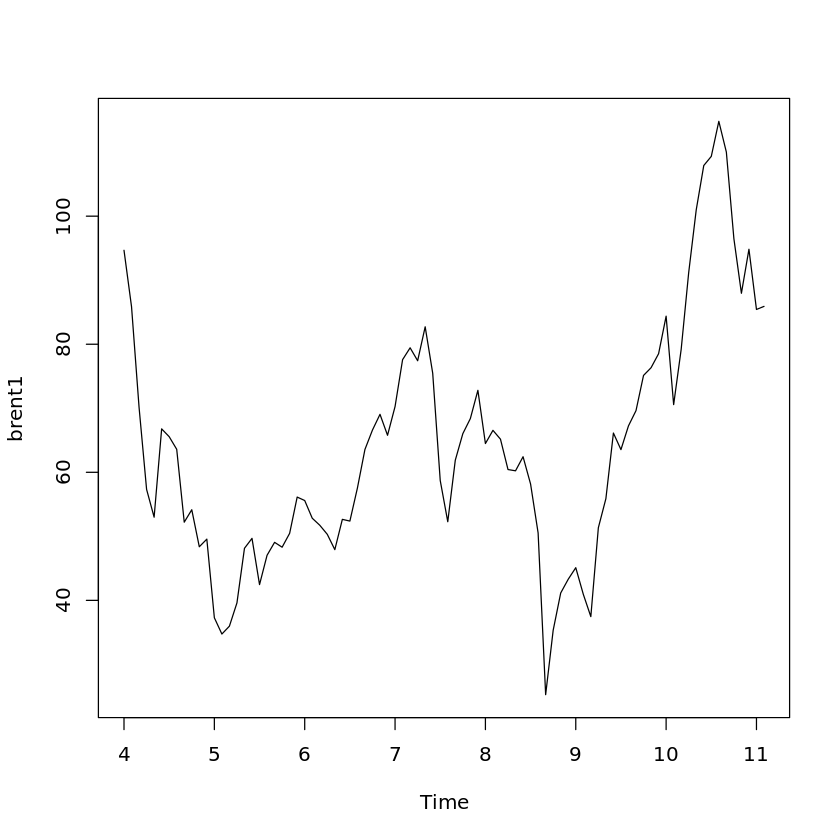

In [56]:
plot(brent1)
m1<- tslm(brent1~ trend+ season)
summary(m1)
fit<- fitted(m1)

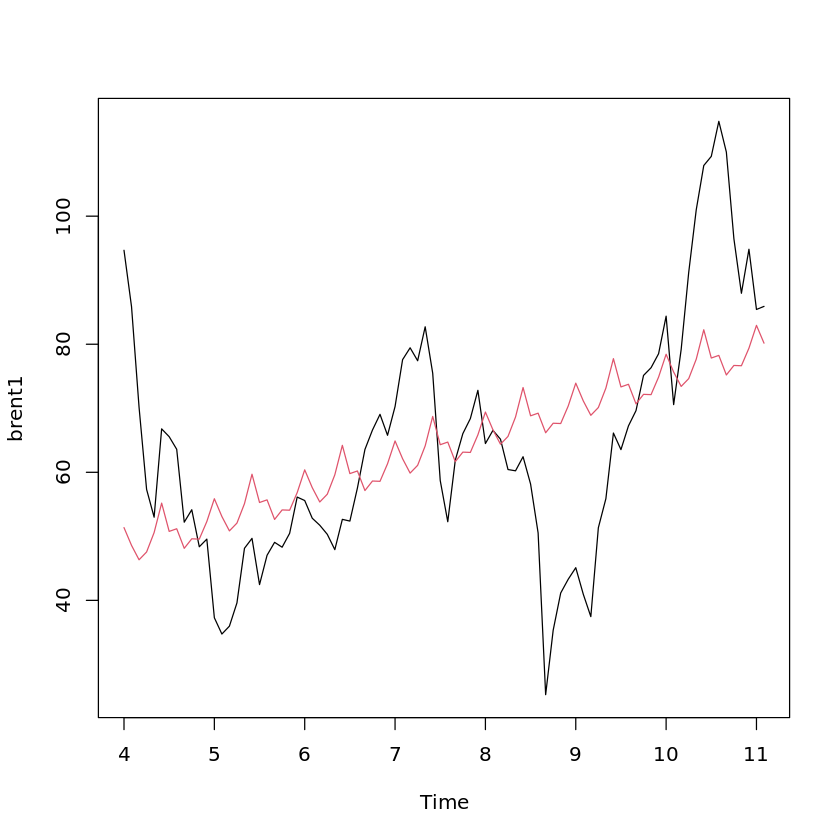

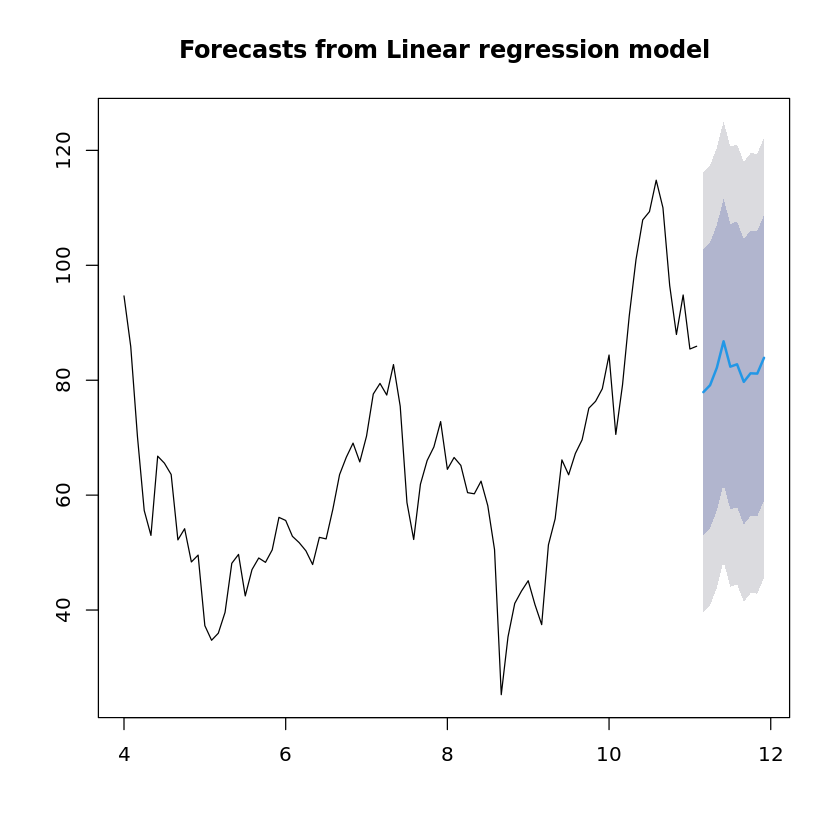

In [57]:
plot(brent1)
lines(fitted(m1), col=2)

fore <- forecast(m1)
plot(fore)

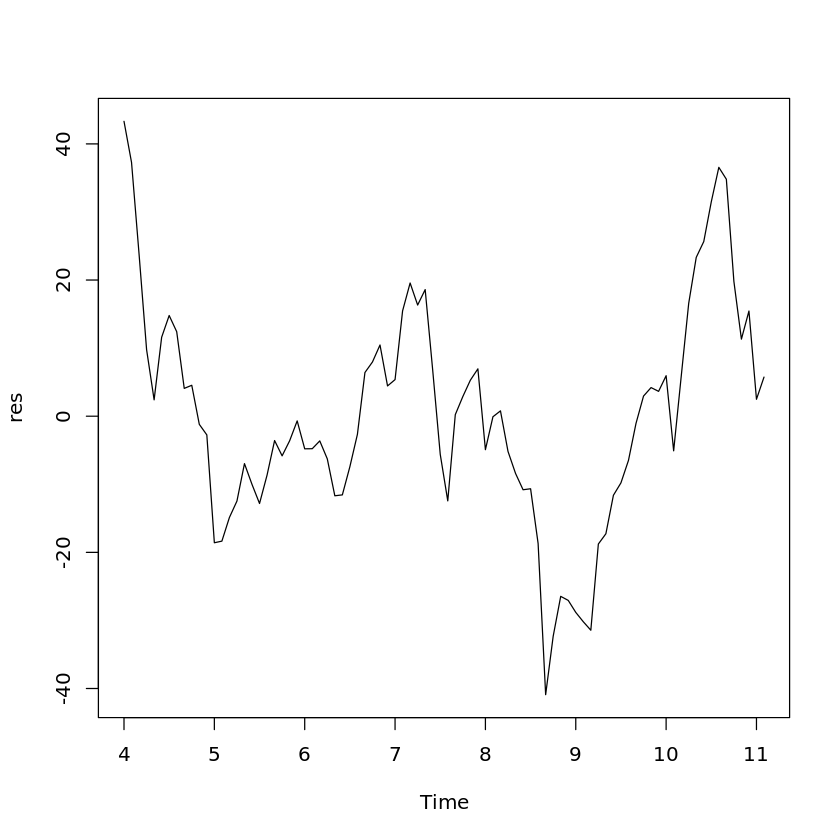

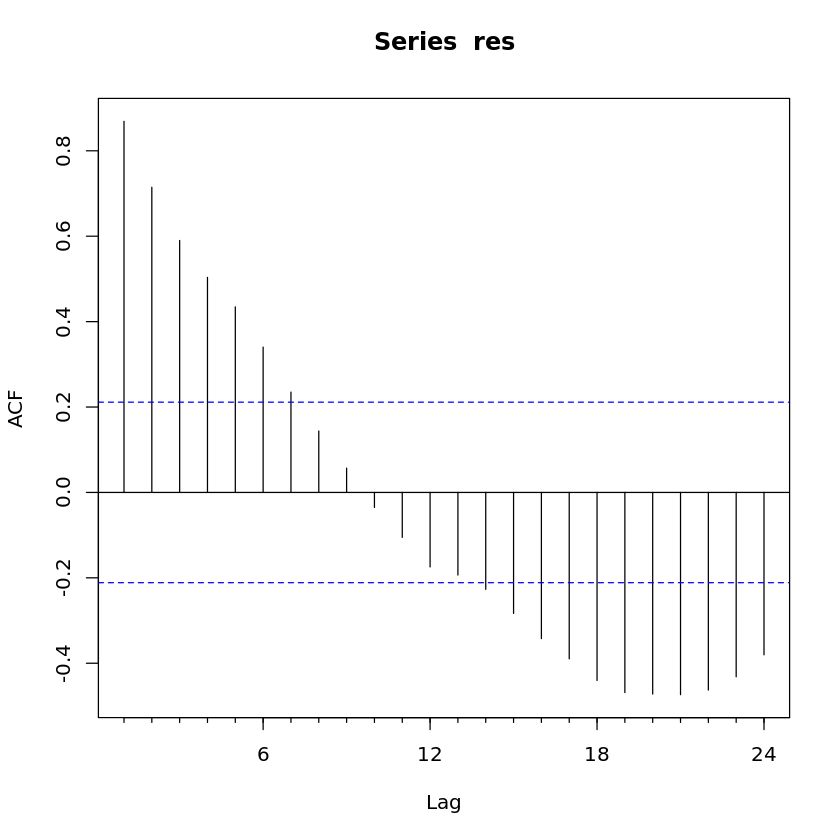

In [58]:
#analysis of residuals
res<- residuals(m1) 
plot(res) 
#the form of residuals seems to indicate the presence of negative autocorrelation
Acf(res)

dw<- dwtest(m1, alt="two.sided")

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,85.83700,92.88251,82.88888,67.37707,56.28670,53.76854,69.76020,65.00819,63.80549,51.30292,56.12364,48.62397
5,51.54516,37.16092,37.35774,38.69493,42.48120,51.24213,51.12559,43.05655,49.89846,50.71493,49.69016,52.33963
6,58.12384,56.29436,53.58755,52.92729,51.47519,49.10328,54.90764,53.37657,59.48501,64.95196,67.19163,69.46412
7,65.31748,71.22838,78.18323,78.78523,76.39338,82.84094,73.34909,56.56974,52.91271,64.45958,66.65686,68.83743
8,73.31961,63.05542,67.53695,65.04151,60.25604,61.04461,63.34394,58.07061,50.62210,23.89293,40.82709,43.76754
9,45.55541,47.19485,42.19570,39.34136,55.50506,57.17368,68.31090,63.05048,68.32271,69.87493,75.71199,75.82189
10,78.25364,84.30812,67.54563,80.76746,91.43262,100.13900,106.05384,106.40510,112.46269,105.79985,92.05386,85.40075
11,94.51012,82.04477,,,,,,,,,,


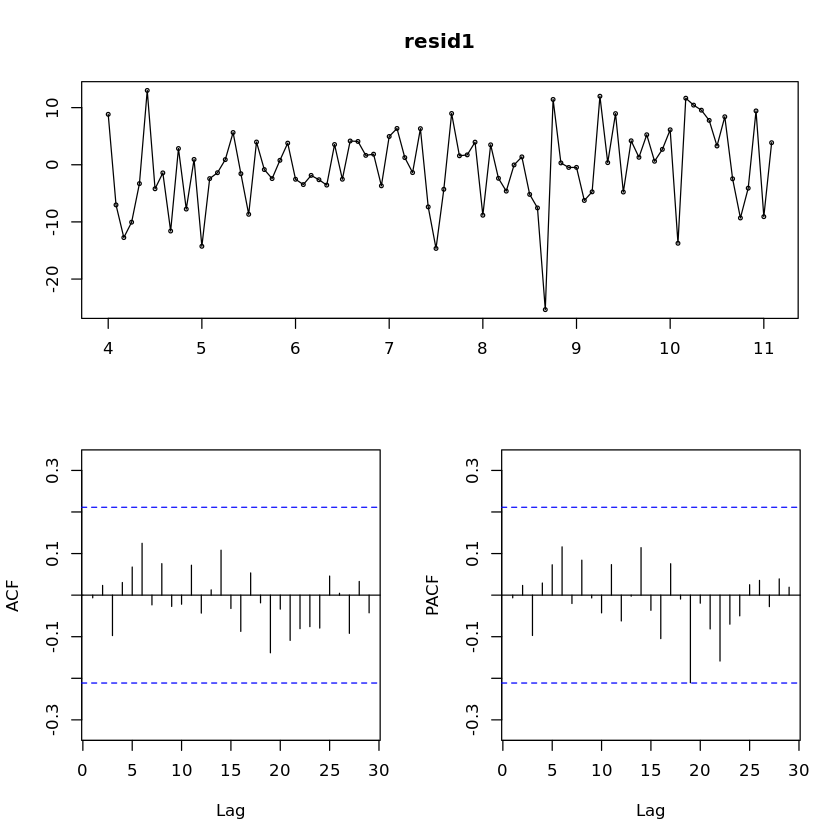

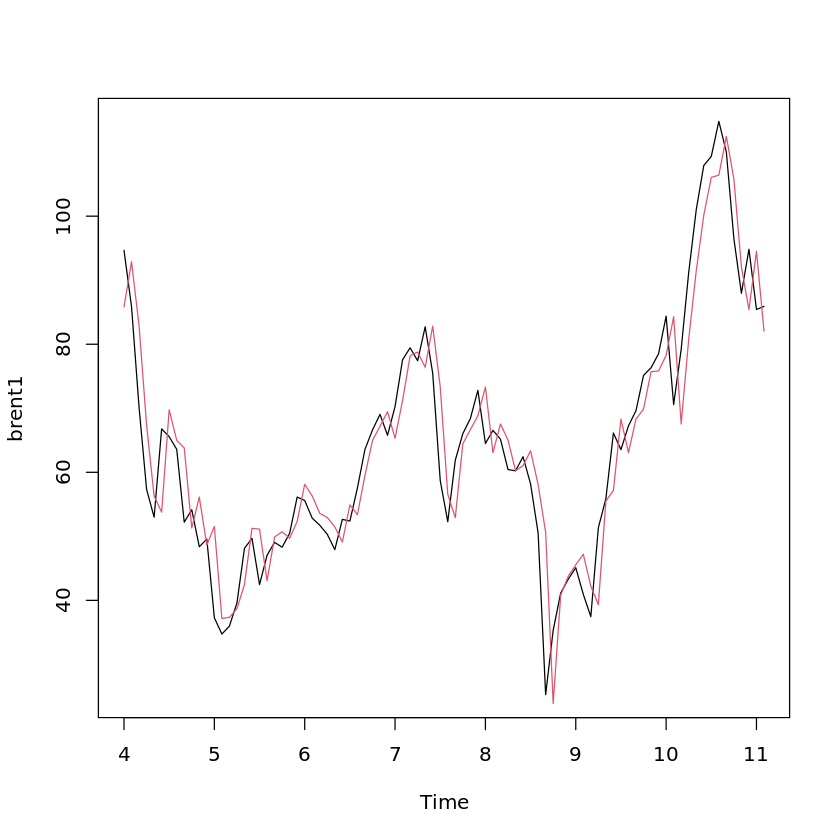

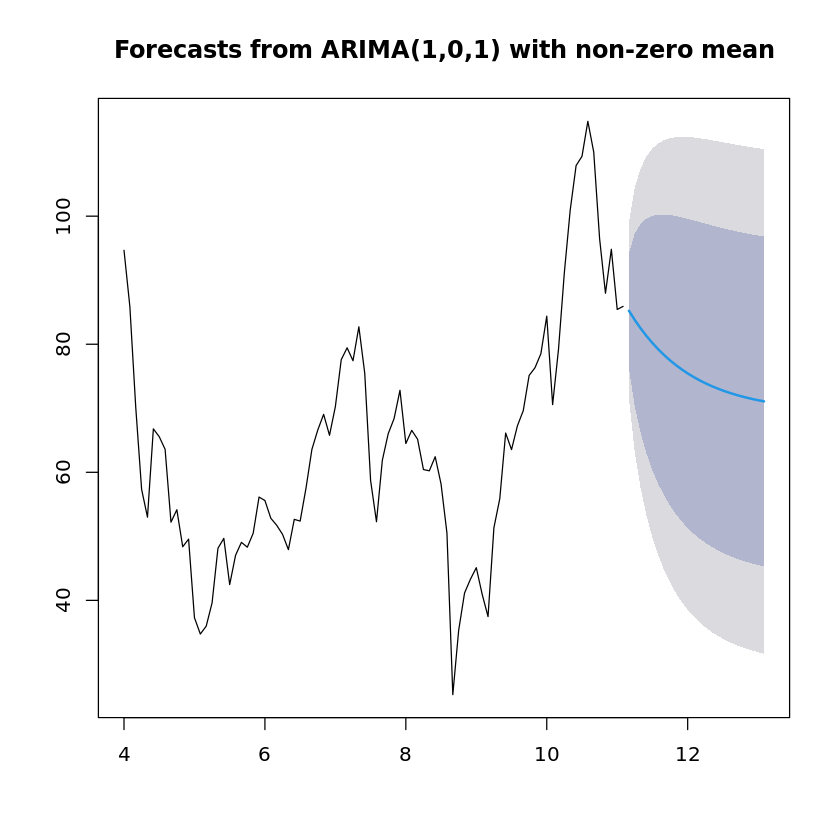

In [59]:
##General indication: if the ACF is exponentially decaying or sinusoidal 
##and there is a significant spike at lag p in PACF and nothing else, 
##it may be an ARMA(p,d,0). 
##If the PACF is exponentially decaying or sinusoidal 
##and there is a significant spike at lag p in ACF and nothing else, it may be an ARMA(0,d,q)

arima1<- Arima(brent1, order=c(1,0,1))
fitted(arima1)

resid1<- residuals(arima1)
tsdisplay(resid1)


plot(brent1)
lines(fitted(arima1), col=2)

for1<- forecast(arima1)
plot(for1)

In [60]:
brent1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,94.67,85.86,70.15,57.33,52.99,66.78,65.56,63.59,52.21,54.15,48.37,49.56
5,37.28,34.74,35.97,39.60,48.13,49.68,42.46,47.04,49.06,48.30,50.47,56.13
6,55.59,52.83,51.73,50.31,47.92,52.65,52.38,57.54,63.57,66.60,69.05,65.78
7,70.27,77.59,79.44,77.42,82.72,75.47,58.71,52.28,61.89,66.03,68.39,72.80
8,64.49,66.55,65.17,60.43,60.23,62.43,58.16,50.52,25.27,35.33,41.15,43.30
9,45.10,40.95,37.46,51.34,55.88,66.13,63.54,67.25,69.63,75.13,76.33,78.52
10,84.38,70.57,79.20,91.21,100.99,107.91,109.34,114.81,110.01,96.49,87.96,94.83
11,85.43,85.91,,,,,,,,,,



 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0)            with non-zero mean : 638.7006
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : 479.3236
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : 565.7424
 ARIMA(0,0,0)            with zero mean     : 876.9232
 ARIMA(1,0,0)            with non-zero mean : 477.2409
 ARIMA(1,0,0)(0,0,1)[12] with non-zero mean : 479.2893
 ARIMA(1,0,0)(1,0,1)[12] with non-zero mean : 481.1951
 ARIMA(2,0,0)            with non-zero mean : 475.9739
 ARIMA(2,0,0)(1,0,0)[12] with non-zero mean : 478.0466
 ARIMA(2,0,0)(0,0,1)[12] with non-zero mean : 477.9972
 ARIMA(2,0,0)(1,0,1)[12] with non-zero mean : 480.0867
 ARIMA(3,0,0)            with non-zero mean : 478.2264
 ARIMA(2,0,1)            with non-zero mean : 478.2282
 ARIMA(1,0,1)            with non-zero mean : 476.1943
 ARIMA(3,0,1)            with non-zero mean : 480.4861
 ARIMA(2,0,0)            with zero mean     : Inf

 Best model: ARIMA(2,0,0)            with non-zero mean 



Series: brent1 
ARIMA(2,0,0) with non-zero mean 
Box Cox transformation: lambda= 0.8413589 

Coefficients:
         ar1      ar2     mean
      1.1184  -0.2011  40.2916
s.e.  0.1056   0.1069   4.4482

sigma^2 = 13.59:  log likelihood = -233.74
AIC=475.48   AICc=475.97   BIC=485.3

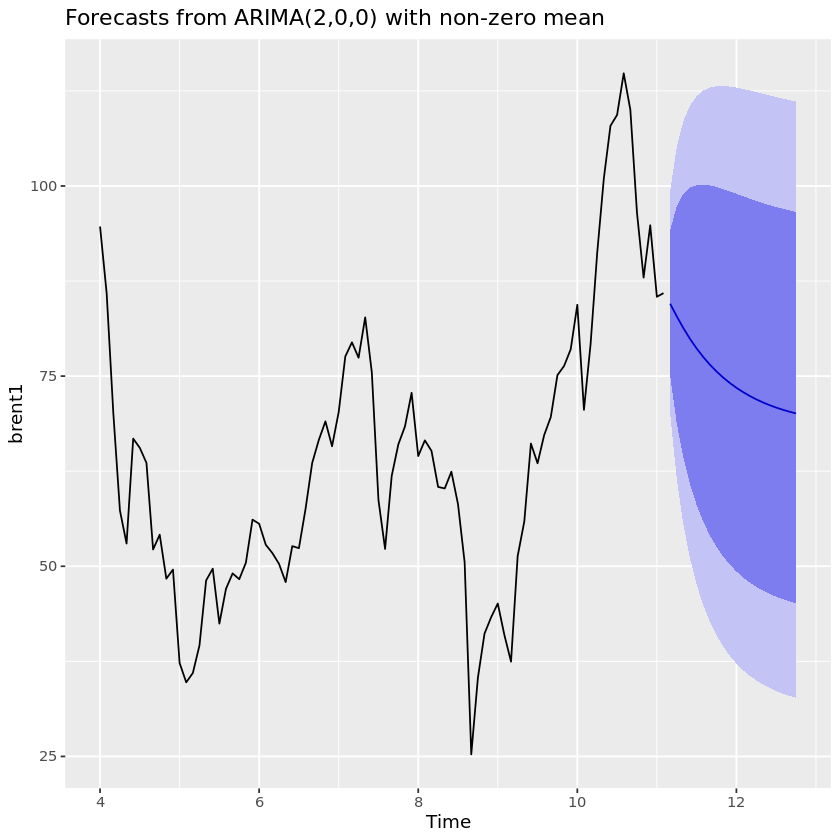


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 8.2763, df = 15, p-value = 0.9122

Model df: 2.   Total lags used: 17



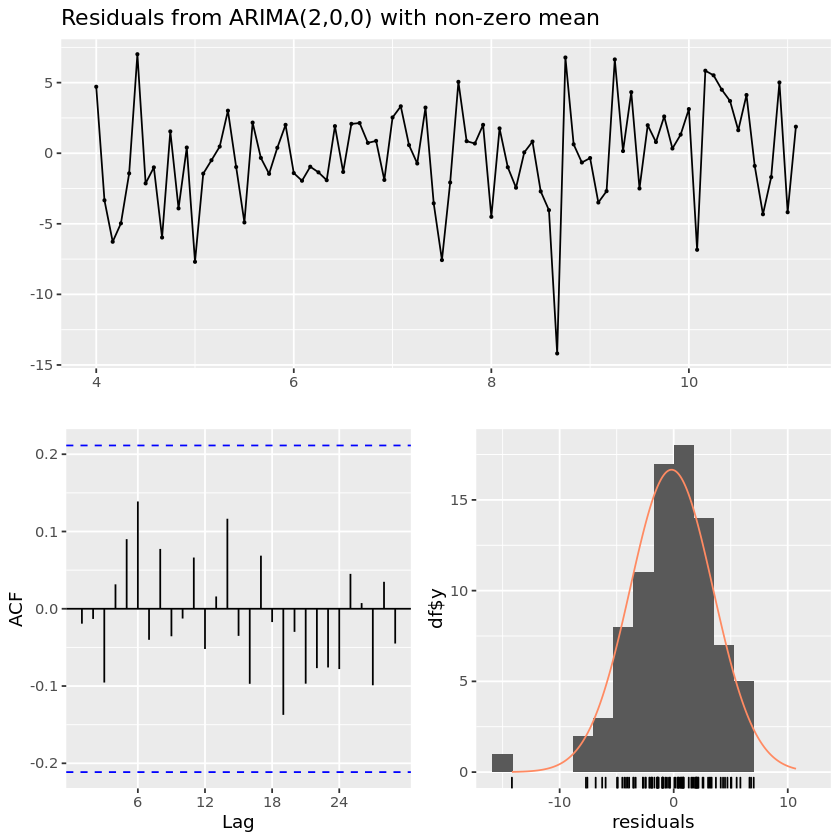

In [61]:
modelfit <- auto.arima(brent1, stationary = TRUE, seasonal = TRUE, stepwise = TRUE, trace = TRUE,
                        approximation = FALSE, allowmean = TRUE, lambda = "auto")
modelfit

#Now that our model is ready, we will forecast the prices for the next few months

price_forecast <- forecast(modelfit, h=20)
autoplot(price_forecast)
checkresiduals(modelfit)

In [62]:
close_br_red <- close_br[0:100]

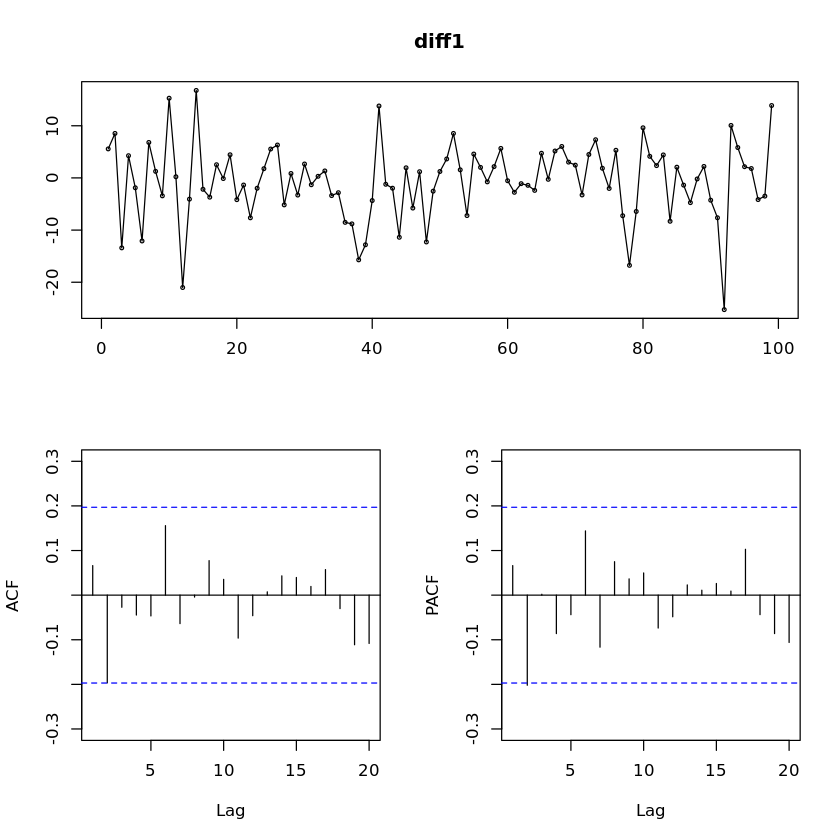

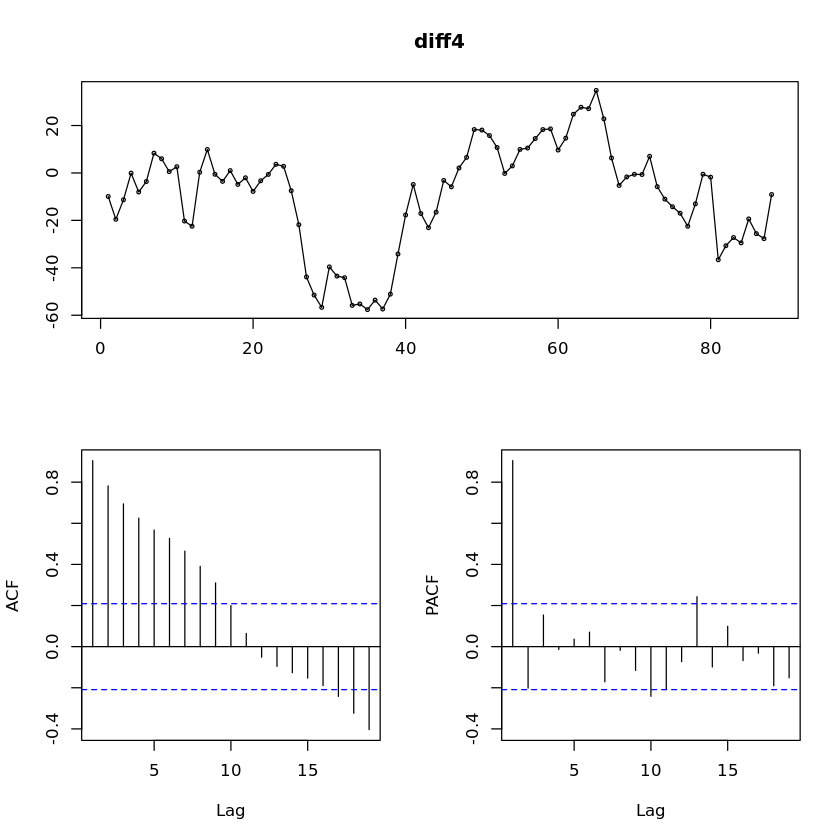

In [63]:
diff1<- diff(close_br_red) ##first difference
diff4<- diff(close_br_red, lag=12) ###seasonal difference
tsdisplay(diff1)
tsdisplay(diff4)

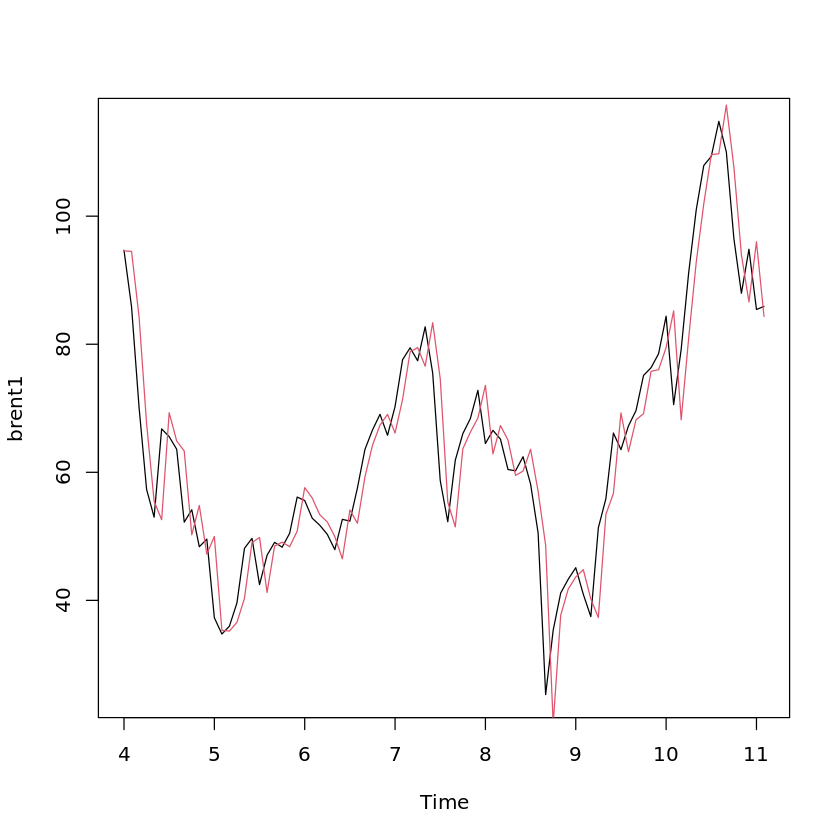

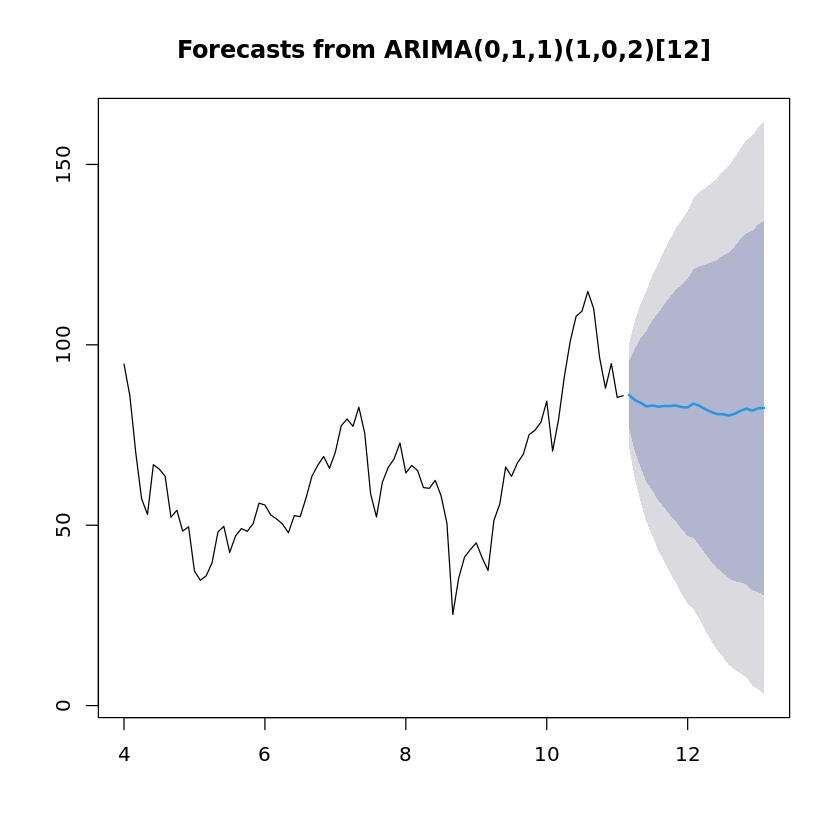

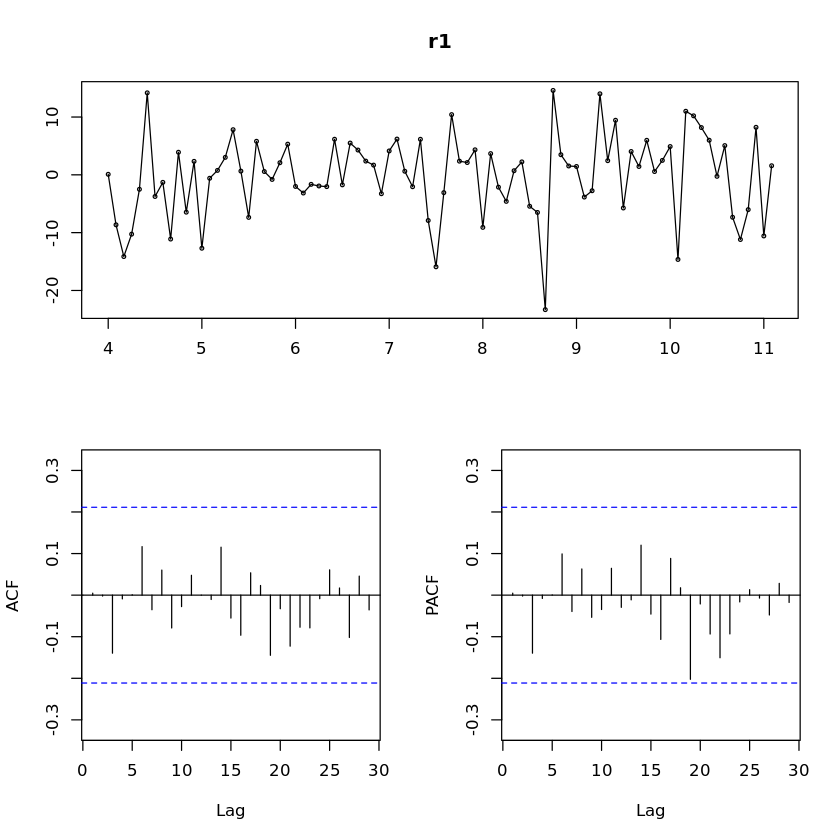

In [64]:
a1<- Arima(brent1,order=c(0,1,1), seasonal=c(1,0,2))
fit1<- fitted(a1)

plot(brent1)
lines(fit1, col=2)

f1<- forecast(a1)
plot(f1)

r1<- residuals(a1)
tsdisplay(r1) 

In [65]:
brent1_vol <- window(vol_br.ts, start=4, end=11 +.9)
brent1_vol

Warning message in window.default(x, ...):
“'end' value not changed”


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,267960,385099,305879,332585,576923,427435,415701,466769,657400,635057,497093,482401
5,596999,725957,683434,574821,605361,543857,493196,566263,505286,575861,806223,656427
6,555947,692804,546946,769381,657977,459431,719378,477658,558759,472859,465261,567268
7,645241,654964,684888,402979,457907,781961,738706,649077,684409,559896,695425,823195
8,1047307,896145,718062,806410,808581,572198,850898,725258,818304,528396,581247,443021
9,405942,483298,609695,528154,586185,611358,774197,703921,547723,669981,775897,590970
10,821979,832636,646880,619239,732123,531264,311730,447644,430112,465973,470730,619846
11,526954,448938,,,,,,,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,86.78085,91.82872,83.97965,66.95171,53.96309,55.82242,69.68156,64.58242,61.98454,51.75470,57.44513,48.50518
5,50.49829,35.93382,37.96608,39.63446,42.01419,52.04446,51.51309,42.23973,50.79673,49.86232,47.47503,54.19866
6,58.72496,54.73042,55.32051,50.24516,53.03798,50.73860,51.99484,56.39503,58.10724,66.19730,67.08678,68.51763
7,64.66052,71.22139,77.80583,81.65794,75.28083,79.81584,74.14447,57.01371,52.34365,65.86173,64.93884,67.75631
8,70.97764,64.58223,68.75612,63.66369,60.25826,63.27723,59.94288,59.81348,49.05856,26.85532,39.84517,45.47250
9,45.72821,46.54449,41.09178,40.41129,54.85083,57.05463,66.67234,63.88803,69.65934,68.30909,74.86807,77.69894
10,75.37999,84.58425,68.99324,80.72671,90.23614,102.32807,107.84391,104.73611,113.06961,105.26088,92.02514,83.82526
11,95.78152,82.45190,,,,,,,,,,


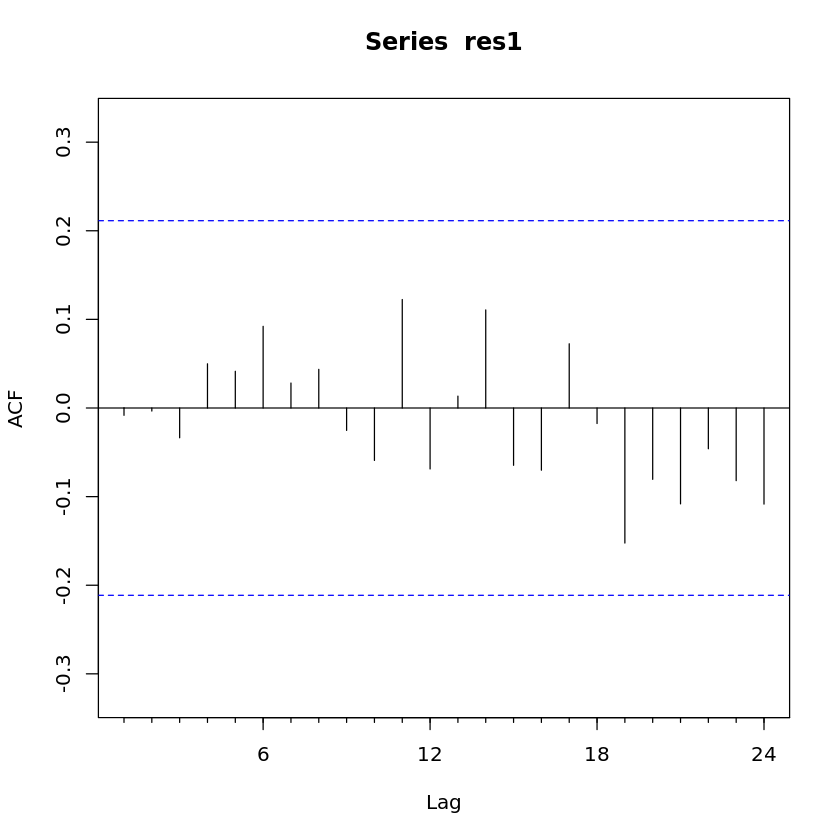

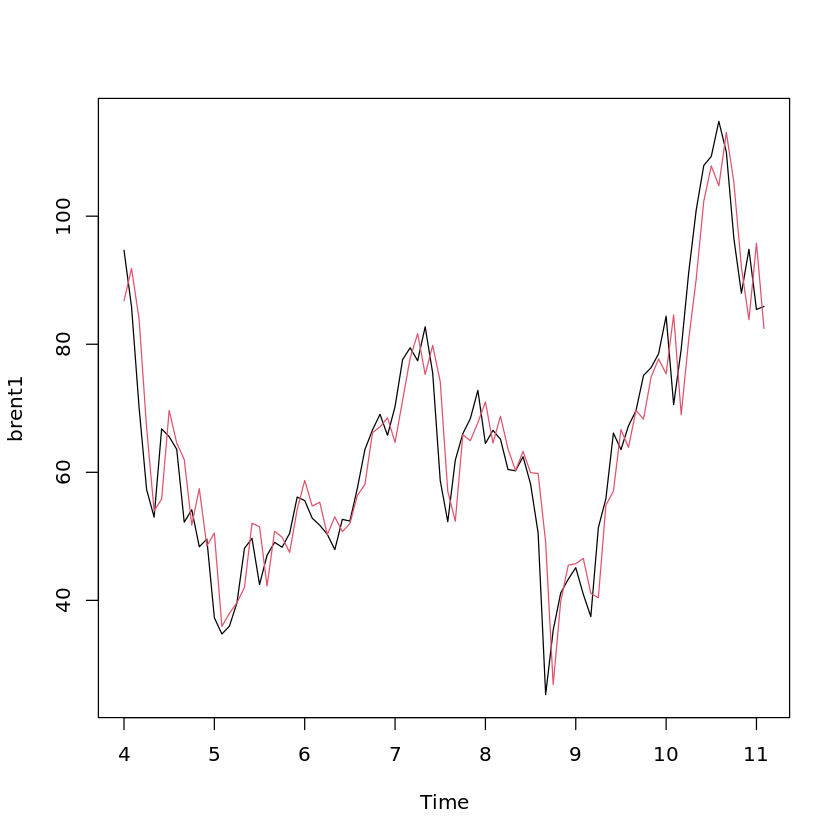

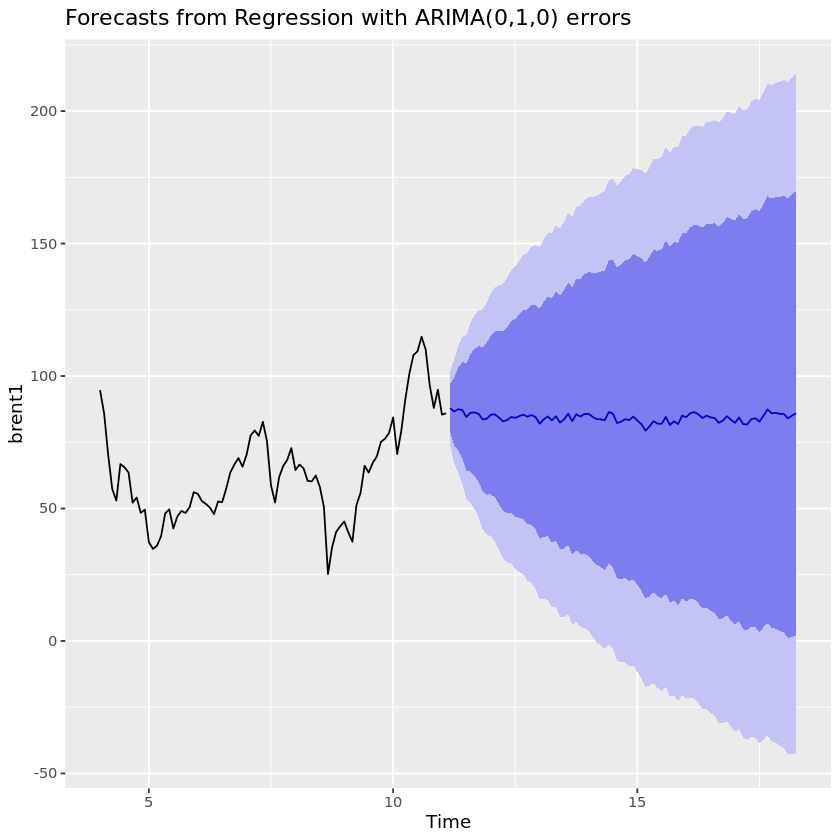


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 8.2763, df = 15, p-value = 0.9122

Model df: 2.   Total lags used: 17



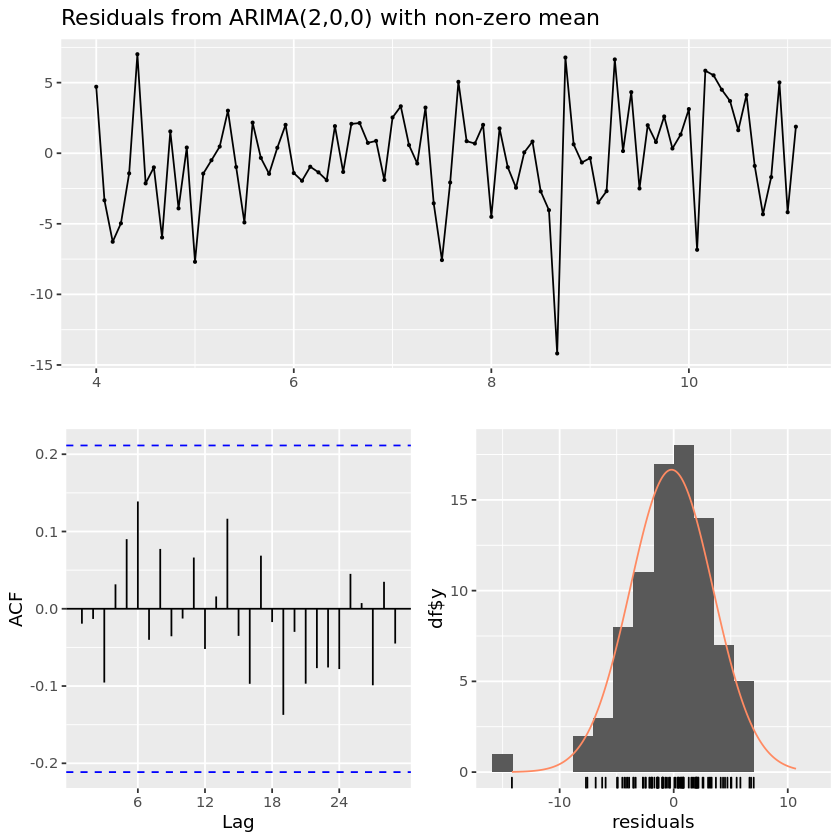

In [67]:
armax1<- Arima(brent1, xreg=brent1_vol, order=c(1,0,1))
res1<- residuals(armax1)
Acf(res1)

fitted(armax1)
plot(brent1)
lines(fitted(armax1), col=2)

########procedure also available with auto.arima
auto.arima<- auto.arima(brent1, xreg=brent1_vol)
price_forecast <- forecast(auto.arima, xreg=brent1_vol, h=20)
autoplot(price_forecast)
checkresiduals(modelfit)

In [72]:
close_crd.ts <- window(close_co.ts, start=4, end=11 +.9)
close_crd.ts

Warning message in window.default(x, ...):
“'end' value not changed”


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,91.16,80.54,66.15,53.27,48.24,59.63,60.30,59.47,47.12,49.20,45.09,46.59
5,37.04,33.62,33.75,38.34,45.92,48.33,41.60,44.70,48.24,46.86,49.44,53.72
6,54.01,50.60,49.33,48.32,46.04,50.17,47.23,51.67,57.40,60.42,64.73,61.64
7,64.94,67.04,74.15,69.80,73.25,65.31,50.93,45.41,53.79,57.22,60.14,63.91
8,53.50,58.47,58.58,55.10,54.18,55.17,51.56,44.76,18.84,35.49,39.27,40.27
9,42.61,40.22,35.79,48.52,52.20,61.50,59.16,63.58,66.32,73.47,73.95,75.03
10,83.57,66.18,75.21,88.15,95.72,100.28,104.69,105.76,98.62,89.55,79.49,86.53
11,80.55,80.26,,,,,,,,,,


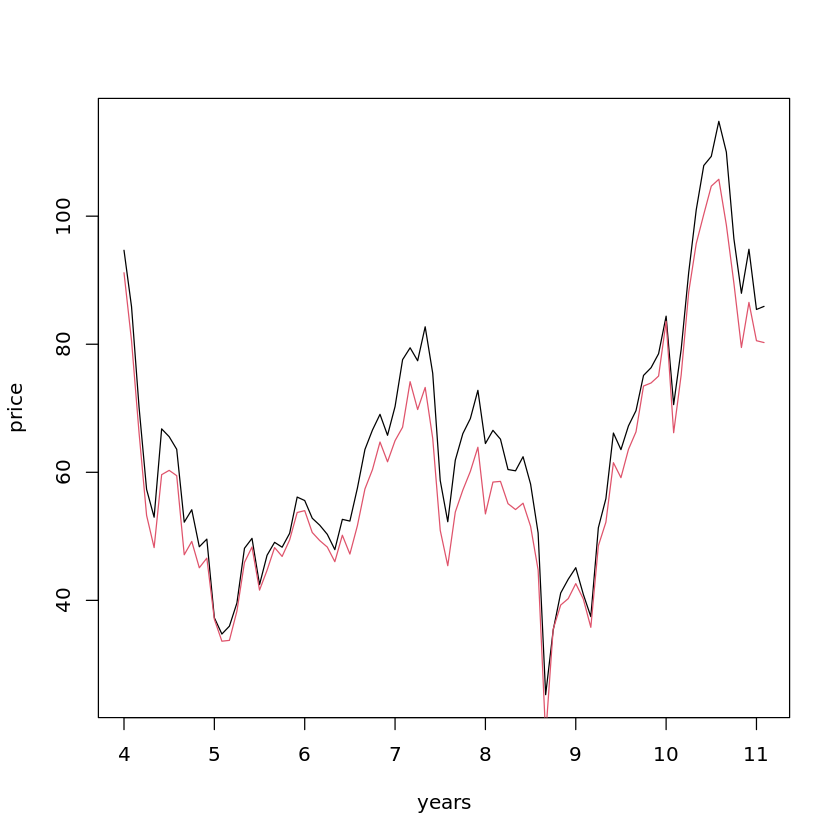

In [73]:
plot(brent1, ylab="price", xlab="years")
lines(close_crd.ts, col=2)

[1] 346.3372


Call:
tslm(formula = brent1 ~ trend + season + close_crd.ts)

Residuals:
   Min     1Q Median     3Q    Max 
-4.444 -1.696 -0.476  1.627  7.839 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.533133   1.367393  -0.390   0.6978    
trend         0.006993   0.012981   0.539   0.5917    
season2       1.260737   1.295023   0.974   0.3336    
season3       0.491388   1.343245   0.366   0.7156    
season4       0.405341   1.341707   0.302   0.7634    
season5       1.297274   1.339707   0.968   0.3361    
season6       2.118649   1.338132   1.583   0.1177    
season7       1.479715   1.340181   1.104   0.2732    
season8       1.902364   1.340622   1.419   0.1602    
season9       2.637181   1.347102   1.958   0.0541 .  
season10      0.793536   1.342451   0.591   0.5563    
season11      0.757438   1.343310   0.564   0.5746    
season12      1.128576   1.341361   0.841   0.4029    
close_crd.ts  1.062457   0.018429  57.652   <2e-16 ***
---
Signif. co

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,96.32744,86.31187,70.26076,56.49726,52.05203,64.98178,65.06168,64.60949,52.22995,52.60322,48.20741,50.17923
5,38.91118,36.54531,35.92107,40.71870,49.67104,53.05994,45.27766,49.00092,53.50383,50.20098,52.91302,57.83847
6,57.02499,54.66974,52.55807,51.40593,49.88246,55.09877,51.34321,56.49016,63.31985,64.69182,69.24191,66.33704
7,68.72157,72.22046,79.01217,74.31143,78.87583,71.26829,55.35822,49.92310,59.56830,61.37587,64.44914,68.83274
8,56.65098,63.19912,62.55364,58.77723,58.69869,60.57889,56.11149,49.31642,22.51935,38.37261,42.35959,43.80017
9,45.16474,43.89320,38.42416,51.87018,56.67895,67.38817,64.27008,69.39578,73.04872,78.80864,79.28951,80.81509
10,88.76689,71.55850,80.39013,94.05927,103.00099,108.67416,112.72766,114.29413,107.45000,95.97686,85.25944,93.11727
11,85.64220,86.60181,,,,,,,,,,


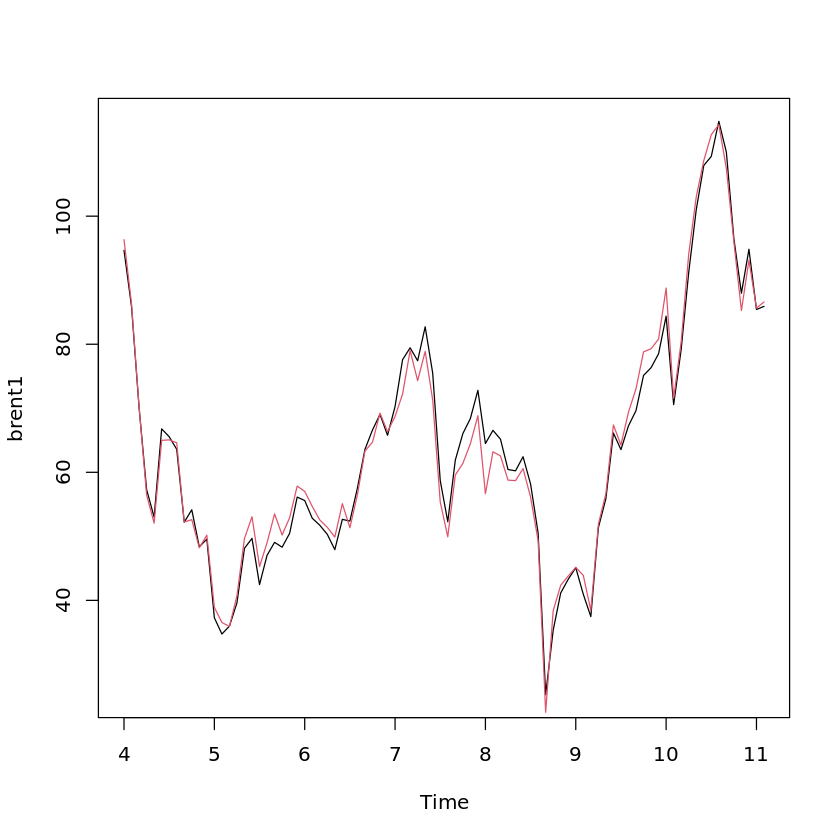

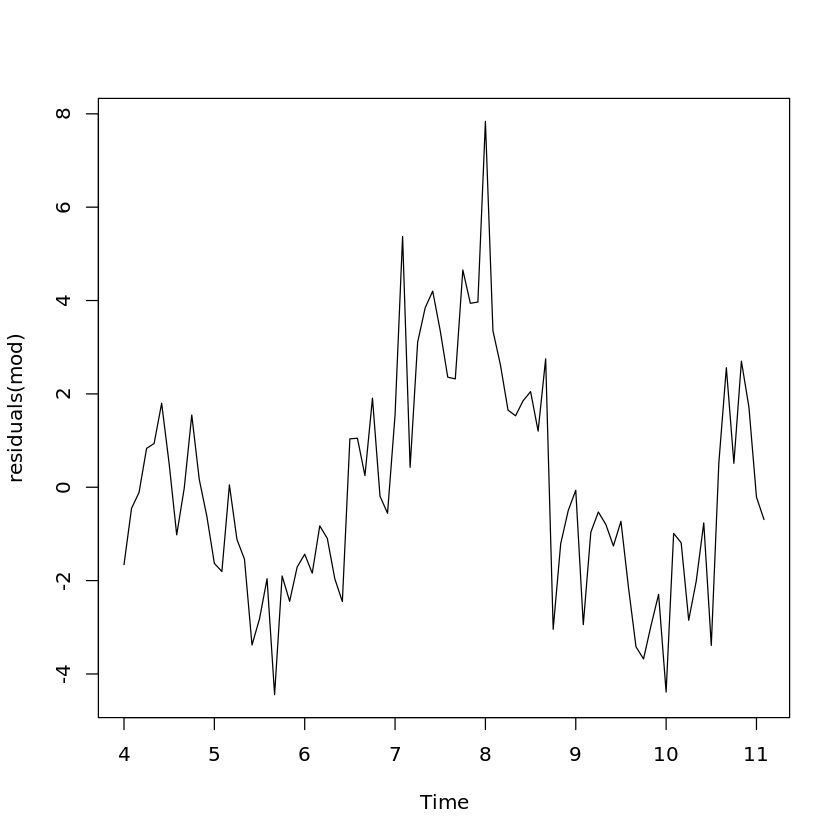

In [74]:
####we try with a simple arima model, ARMAX
auto.a<- auto.arima(brent1, xreg=close_crd.ts) 
AIC(auto.a)

###### we try with a regression model with trend, season and external variable
mod<- tslm(brent1~ trend+season+close_crd.ts) 
summary(mod)
fitted(mod)
plot(brent1)
lines(fitted(mod), col=2)
plot(residuals(mod))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
4,-0.52986236,-0.98020066,-0.55789799,-0.49395123,0.28440851,0.57348282,1.14791867,0.64265075,0.24125433,0.22957052,0.33953436,0.24392001
5,0.48526016,-0.91270846,-1.28035863,-1.10844290,-1.25304073,-1.16732117,-1.74330145,-1.49072890,-2.11708703,-3.40236884,-1.82370979,-2.35198287
6,-0.86594991,-1.25276559,-1.93408023,-0.99501730,-1.03796280,-0.45450351,-1.22836650,-0.26251042,0.59003535,0.02572677,1.39147362,-0.03009363
7,0.54048636,0.75360470,1.91066288,1.26317487,3.39809307,2.80393681,2.39858748,2.63332831,2.80499021,1.64600677,3.53667510,3.09303085
8,3.23317260,3.42071268,4.02069933,3.30442797,1.88412872,1.16915637,1.14474218,1.65233567,1.48215610,0.90757058,-0.78544501,-0.27102561
9,-2.90374663,-0.43709377,-0.94213359,-0.16473409,-1.13408622,-0.94028901,-1.10587377,-0.54022901,-1.83740670,-0.54839836,-2.46599425,-2.65315765
10,-3.44287136,-2.18677043,-1.59573937,-1.87189054,-1.77767050,-1.42490910,-1.56695168,-1.61257189,0.18084390,1.17492876,0.82009798,1.89849018
11,1.50671504,0.52121405,,,,,,,,,,


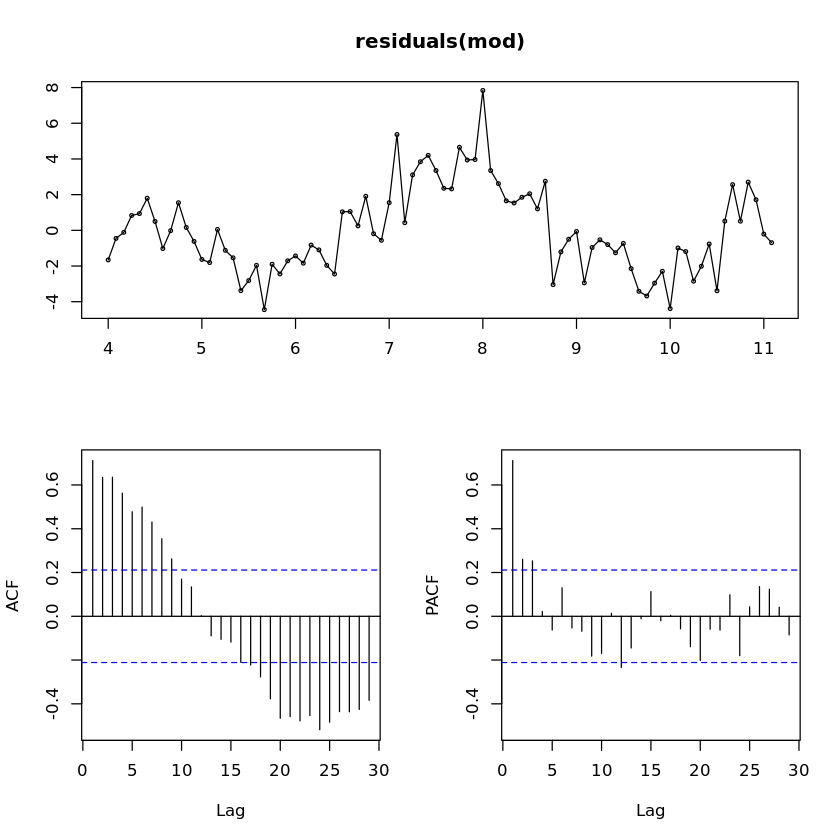

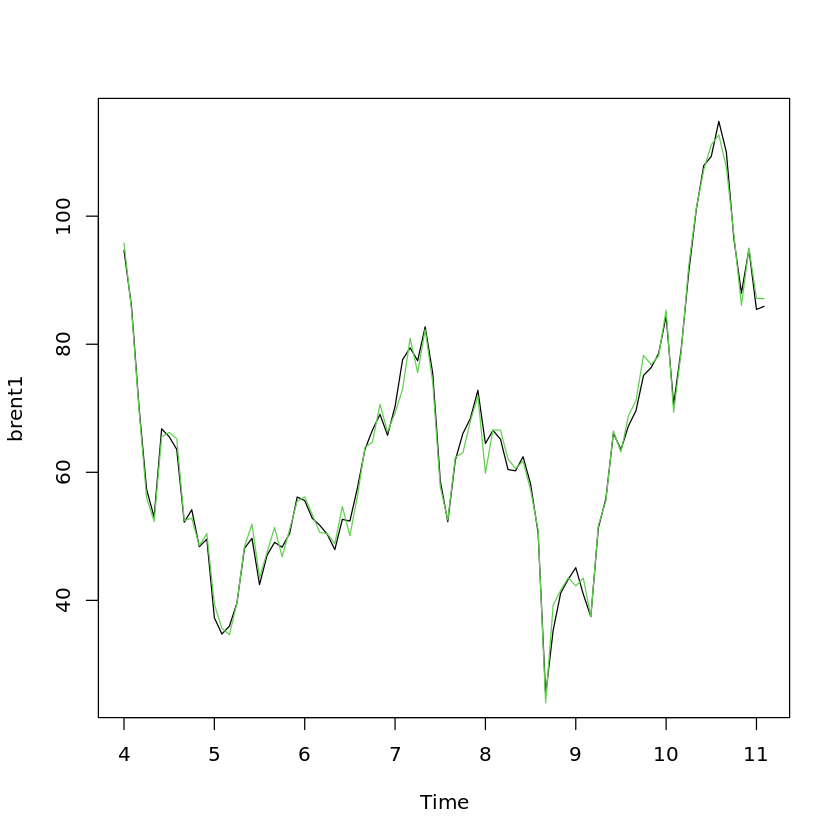

In [75]:
#####analysis of residuals: autocorrelation? 
dw<- dwtest(mod, alt="two.sided")
tsdisplay(residuals(mod))

#####fit an arima model to residuals
aar<- auto.arima(residuals(mod))
fitted(aar)

#######complete the analysis by summing predictions made with linear model and arma on residuals
plot(brent1)
lines(fitted(mod)+fitted(aar), col=3)

######Notice the difference between the two methods: ARMAX and linear regression+ arima on residuals

In [137]:
## garch modelling
## day-day trading
d_co <- getSymbols("CL=F", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_d_co = data.frame(date = index(d_co), d_co, row.names=NULL)
df_d_co<- na.omit(df_d_co)
df_d_co.ts <- ts(df_d_co$CL.F.Close)
df_d_co.ts
## daily return

daily_ret <- (df_d_co$CL.F.Open-df_d_co$CL.F.Close)/df_d_co$CL.F.Close

daily_ret <- data.frame(df_d_co$date, daily_ret)
colnames(daily_ret) <- c("date", "return")
rownames(daily_ret) <- 1:nrow(daily_ret)

downloading  CL=F .....

done.


Warning message:
“CL=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


A Time Series:
   [1]  91.11  91.86  91.40  91.54  91.38  90.86  88.86  89.11  87.87  86.19
  [11]  87.33  85.64  89.34  92.19  90.77  90.86  90.54  89.03  87.48  86.94
  [21]  86.71  86.73  85.58  84.81  84.32  84.99  86.36  86.20  93.57  98.10
  [31]  97.28  97.88  96.97  99.63 102.23 101.91 104.42 105.44 105.02 104.38
  [41] 102.70 101.16 101.19  97.18  97.98 101.42 101.07 102.33 104.00 105.75
  [51] 105.60 105.40 103.98 104.79 104.27 106.72 107.94 108.47 108.34 108.83
  [61] 110.30 112.79 109.92 106.25 107.11 108.11 109.66 107.12 108.15 111.45
  [71] 112.29 112.28 112.21 112.76 112.86 113.93 113.52 111.05 109.24  99.80
  [81]  97.18 102.55 103.88  98.21  98.97  99.65  97.37  96.91 100.10  98.44
  [91]  99.49  97.70  99.59 101.32 100.23 100.59 102.70 100.29 100.40 100.22
 [101]  99.01  99.09 100.74 101.93  99.29  97.30  99.37  94.81  94.95  93.01
 [111]  93.26  93.40  95.41  91.02  91.16  90.61  92.89  94.77  95.42  94.94
 [121]  96.89  96.65  98.67  96.20  95.15  97.43  98.05  95.69  97.24  95.93
 [131]  97.50  98.14  99.13  99.87  99.20  99.59  97.40  97.44  95.70  94.89
 [141]  93.79  91.93  86.63  86.88  81.31  79.30  82.89  85.72  85.38  87.88
 [151]  86.65  87.58  82.38  82.26  84.12  85.44  85.16  85.30  85.37  87.27
 [161]  88.90  88.81  88.93  86.45  86.02  89.34  89.05  87.24  88.19  90.21
 [171]  88.91  89.40  87.96  85.70  86.89  85.92  80.51  79.85  80.24  84.45
 [181]  81.21  82.14  79.20  77.61  75.67  79.68  82.59  82.98  85.41  85.81
 [191]  85.57  84.23  86.80  86.38  88.34  86.11  85.30  87.40  91.27  93.17
 [201]  90.20  93.96  93.32  93.19  92.19  92.51  94.07  94.26  95.52  96.80
 [211]  95.74  97.78  98.99  98.14  99.37 102.59  98.82  97.41  96.92  98.01
 [221]  96.17  96.77  98.21  99.79 100.36 100.20 100.96 100.99 101.28 100.49
 [231]  98.34  99.41  97.77 100.14  94.95  93.87  93.53  93.88  97.22  98.67
 [241]  99.53  99.68 101.34  99.36  99.65  98.83 102.96 103.22 101.81 101.56
 [251] 101.31 102.24 100.87  99.10  98.70 100.71 100.59 100.39  98.46  99.58
 [261]  98.95  99.40  99.70  99.56  98.78  98.48  97.61  96.36  97.84  96.91
 [271]  98.41  98.71  99.84  98.67 100.91 100.74 101.80 102.31 103.24 105.84
 [281] 106.28 107.83 109.77 108.56 106.55 107.07 108.84 106.70 106.72 104.70
 [291] 106.16 106.58 107.40 106.34 106.71 105.43 105.11 107.06 108.09 105.61
 [301] 107.27 105.35 106.87 107.03 107.33 105.41 102.78 103.02 105.23 104.01
 [311] 101.47 103.31 102.46 101.02 102.70 103.64 102.83 102.93 104.20 102.67
 [321] 102.27 103.05 103.11 103.55 104.12 104.55 104.93 104.87 106.16 105.22
 [331] 102.54  98.49  97.94  97.01  96.81  97.08  96.13  94.78  93.98  92.81
 [341]  92.56  91.48  92.57  91.66  89.90  90.66  90.86  90.76  87.82  86.53
 [351]  83.23  83.98  84.29  85.02  84.82  84.10  82.70  83.32  82.62  83.91
 [361]  84.03  83.27  84.03  81.80  78.20  79.76  79.21  79.36  80.21  77.69
 [371]  84.96  83.75  87.66  87.22  84.45  85.99  83.91  85.81  86.08  87.10
 [381]  88.43  89.22  89.87  92.66  91.44  88.14  88.50  88.97  89.39  90.13
 [391]  89.78  88.06  88.91  87.13  91.40  92.20  93.67  93.35  93.36  92.87
 [401]  92.73  93.43  94.33  95.60  96.01  95.97  96.68  97.26  96.27  96.15
 [411]  95.47  96.33  95.49  94.62  96.47  95.30  95.36  95.53  96.42  96.54
 [421]  97.17  97.01  98.31  99.00  96.62  95.29  91.98  91.87  92.89  91.93
 [431]  91.37  89.98  91.85  92.19  92.48  91.89  88.14  91.71  89.88  89.33
 [441]  92.39  91.25  92.07  91.86  91.85  92.09  92.12  92.10  90.05  88.73
 [451]  86.67  85.73  86.05  86.28  86.24  87.09  84.86  85.65  88.71  84.44
 [461]  85.09  86.07  85.57  85.38  86.32  85.45  86.67  89.28  86.75  87.38
 [471]  88.28  87.74  87.18  86.49  88.07  88.91  89.09  88.50  87.88  86.26
 [481]  85.93  85.56  85.79  86.77  85.89  86.73  87.20  87.93  89.51  90.13
 [491]  88.66  88.61  90.98  90.87  90.80  91.82  93.12  92.92  93.09  93.19
 [501]  93.15  93.10  93.82  93.56  94.14  93.28  94.24  95.49  95.56  96.24
 [511]  95.23  95.95  95.88  96.44  97.57  97.94  97.49  9

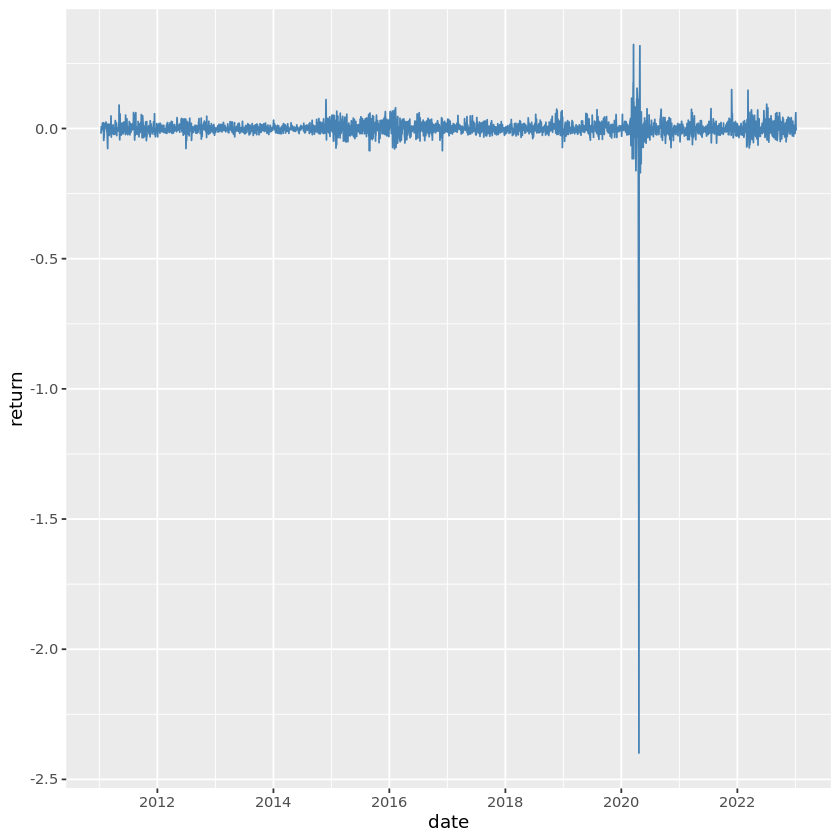

In [138]:
p1 <- ggplot(daily_ret, aes(x=date, y=return))
p1 + geom_line(colour="steelblue")

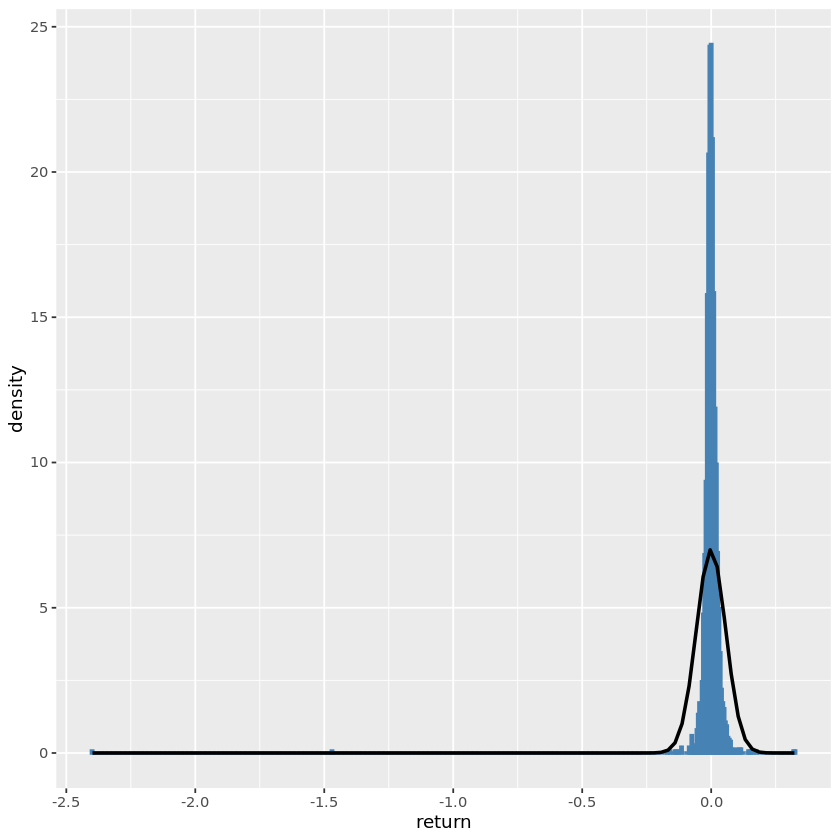

In [139]:
p2 <- ggplot(daily_ret) 

p2 + geom_histogram(aes(x=return, y=..density..), binwidth = 0.005, color="steelblue", fill="grey", size=1) +
  stat_function(fun = dnorm, args = list(mean = mean(daily_ret$return, na.rm = T), sd = sd(daily_ret$return, na.rm = T)), size=1)

# 1. Skewness
# As we can see from the plot the return is not symmetrically distributed, 
#rather it is positive skewed (or right skewed). A positive skewness indicating on average it gives us a positive return. 
#But the level of skewness is not very high. p.s. If the distribution is highly right skewed we can use a log transformation to convert
# it into normal in avioding any misleading results.
# 2. Kurtosis
# The plot show us positive Kurtosis comparing with normal distribution. 
#Kurtosis can be used as a measure of risk. A large Kurtosis is associated with a high level of risk because it 
#indicates that there are high probabilities of extremely large and small returns (Heavy-tailed). 
#Meanwhile, a small kurtosis shows a moderate level of risk for the probabilities of extreme returns are relatively low.

In [140]:
daily_ret_xts <- xts(daily_ret[,-1], order.by=daily_ret[,1])
realizedvol <- rollapply(daily_ret_xts, width = 20, FUN=sd.annualized)
vol <- data.frame(index(realizedvol), realizedvol)
colnames(vol) <- c("date", "volatility")

Warning message:
“Removed 19 row(s) containing missing values (geom_path).”


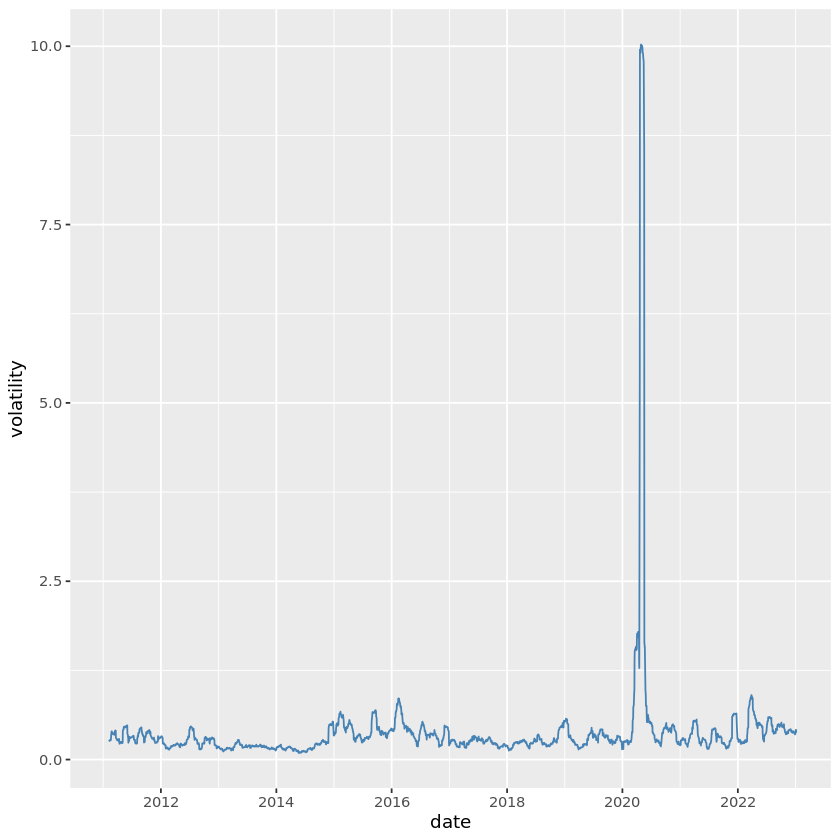

In [142]:
p3 <- ggplot(vol, aes(x=date, y=volatility))
p3 +
  geom_line( color="steelblue")

In [164]:
garch_spec <- ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)),
distribution.model="norm") ##(non) normal innovation
fit_garch <- ugarchfit(spec = garch_spec, data = vol[-c(1:19),2])
fit_garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.256649    0.002638 97.285879        0
omega   0.000473    0.000039 12.244369        0
alpha1  0.962639    0.031324 30.731549        0
beta1   0.000000    0.001943  0.000004        1

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.256649    0.022216 11.552512 0.000000
omega   0.000473    0.000165  2.867183 0.004141
alpha1  0.962639    0.066397 14.498307 0.000000
beta1   0.000000    0.002677  0.000003 0.999997

LogLikelihood : 3242.505 

Information Criteria
------------------------------------
                    
Akaike       -2.1597
Bayes        -2.1517
Shibata      -2.1597
Hannan-Quinn -2.

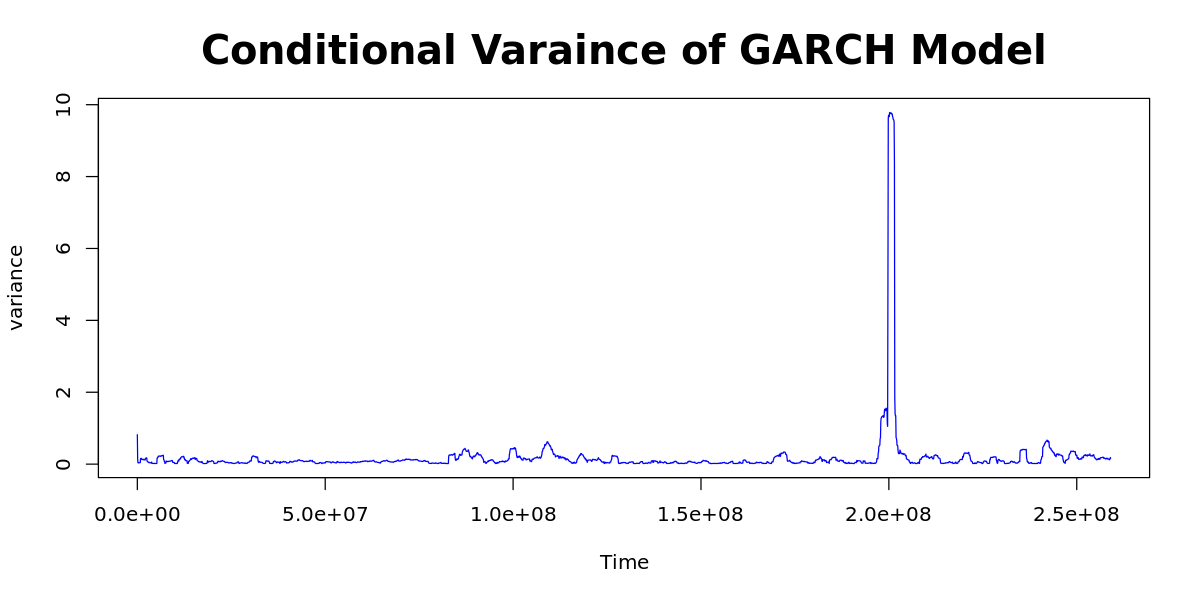

In [162]:
#Conditional Volatility Plot for GARCH Model
plot.ts(sigma(fit_garch), ylab="variance", col="blue", main = "Conditional Varaince of GARCH Model", cex.main=2)

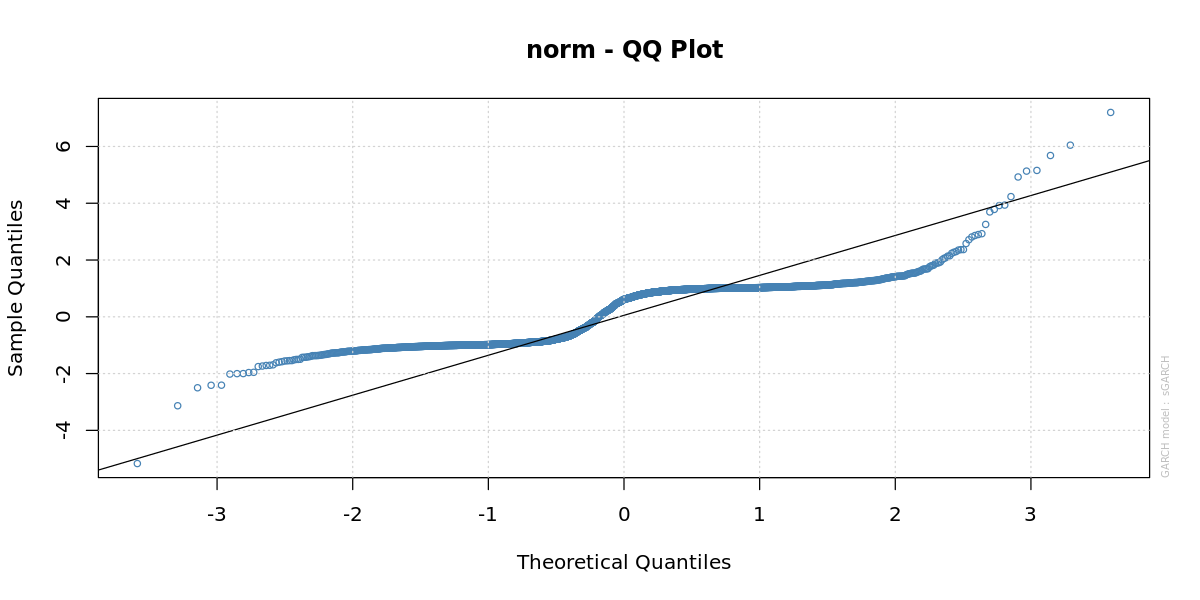

In [166]:
plot(fit_garch, which=9)


please wait...calculating quantiles...


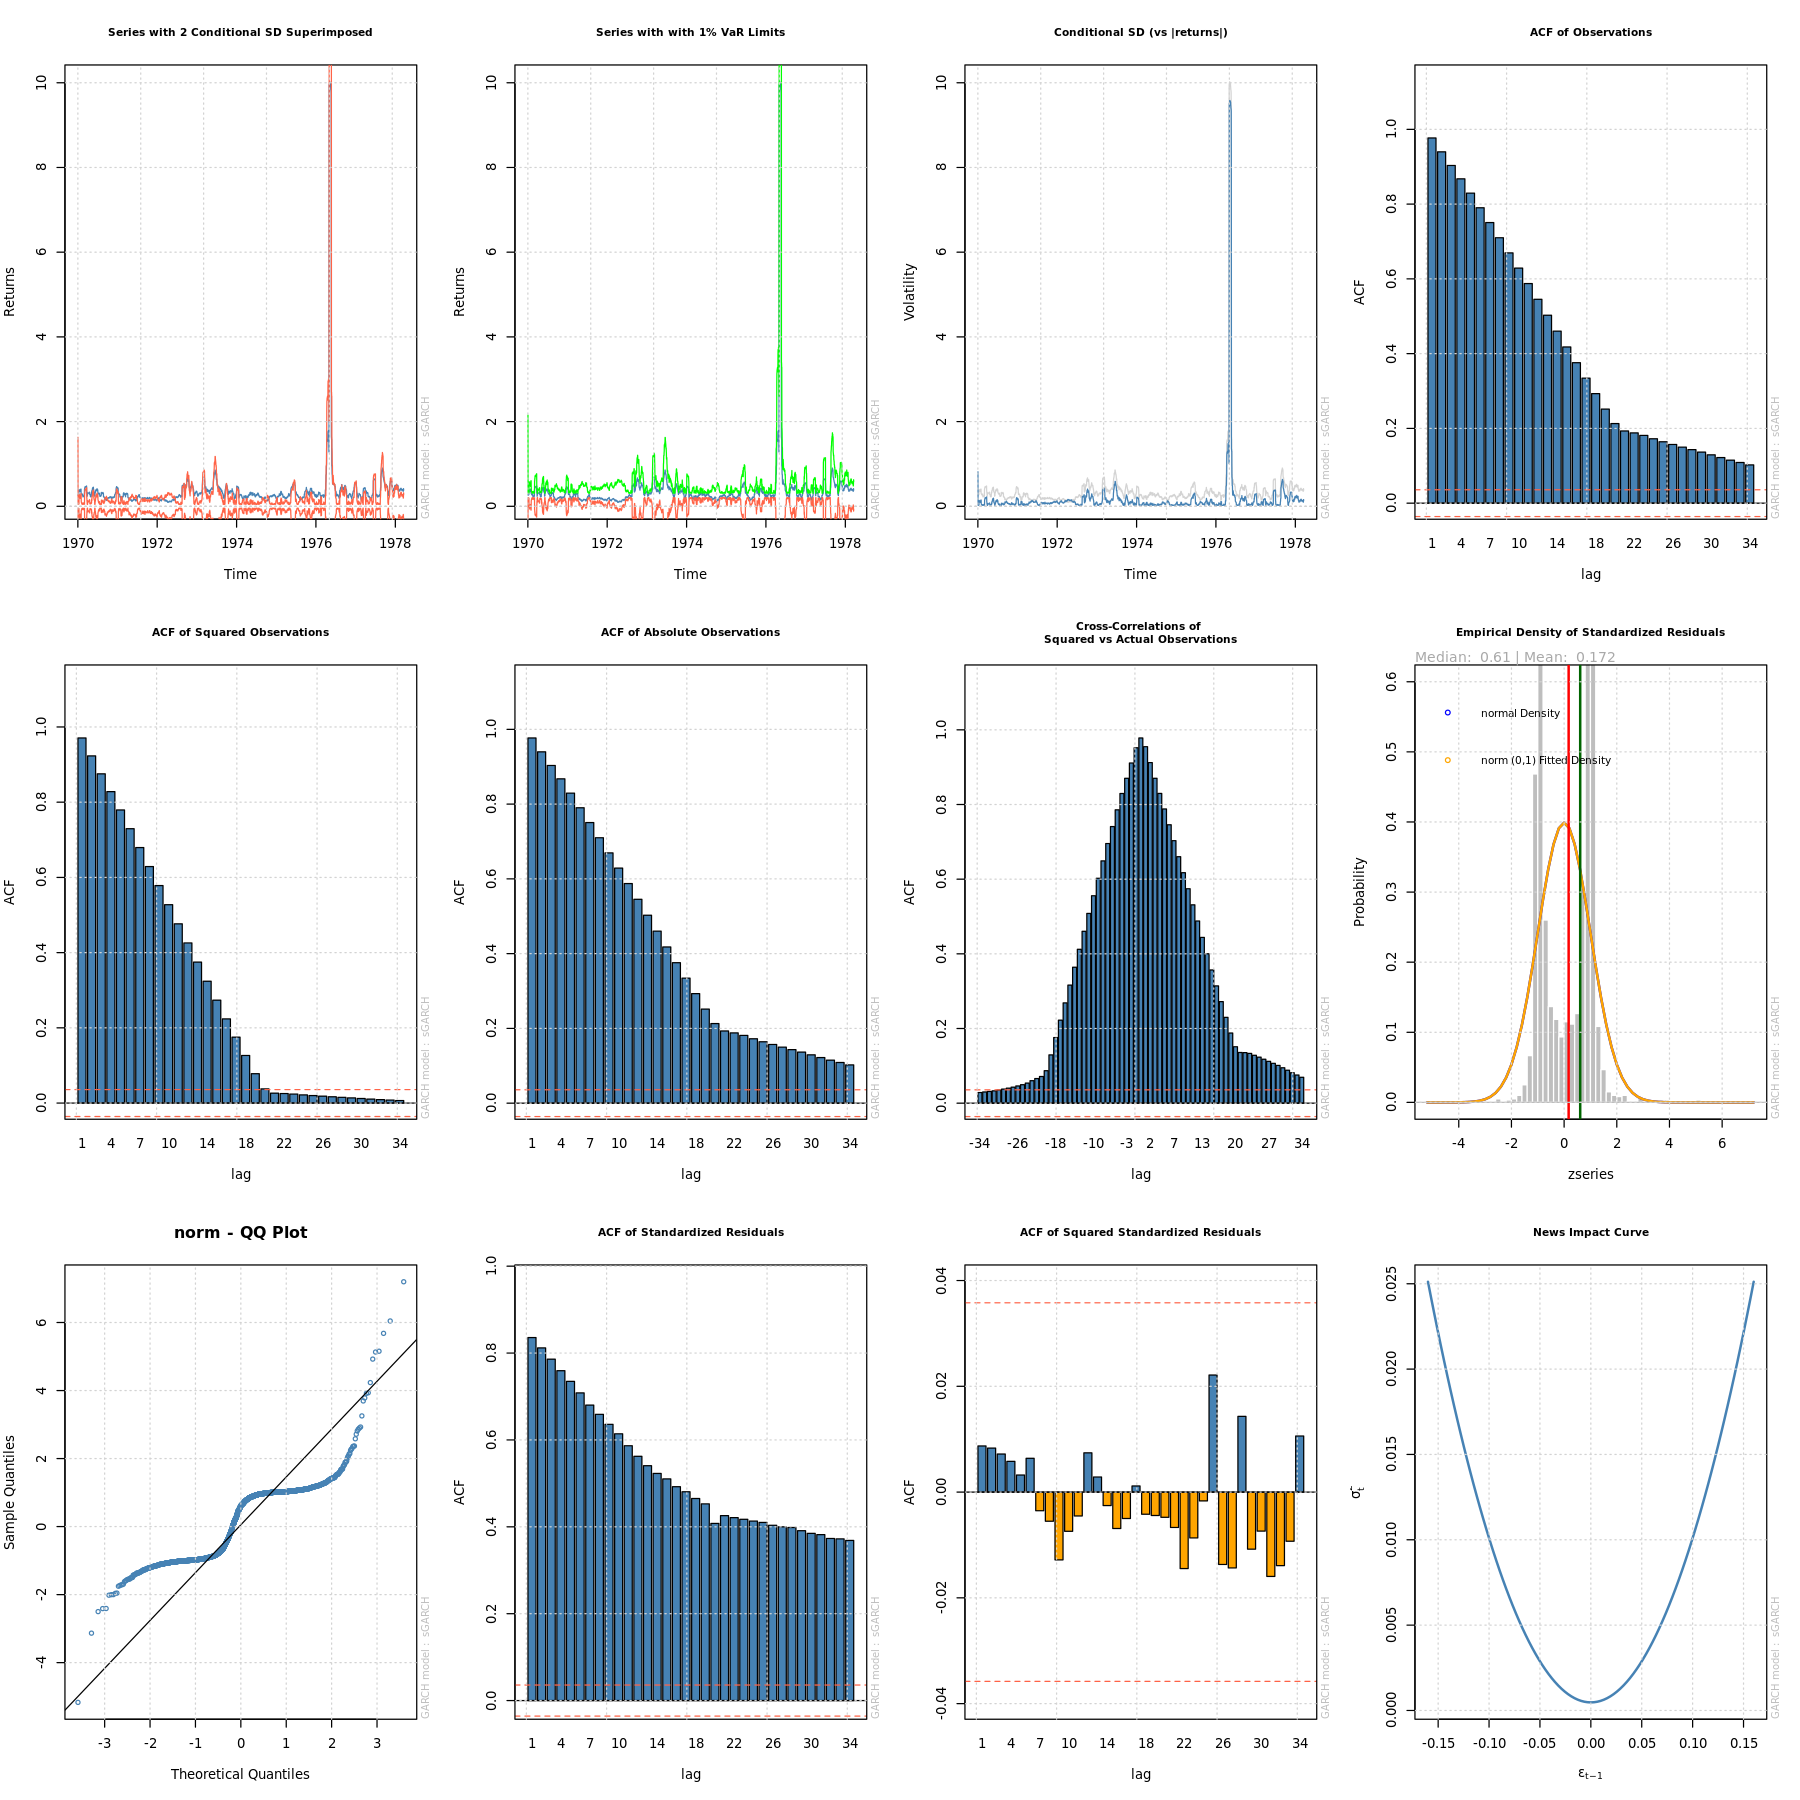

In [168]:
options(repr.plot.width=15, repr.plot.height=15)
plot(fit_garch, which= "all")

In [6]:
####### financial indicators
## USD inflation rate

## USD interest rate

## USD mortage rates

## S&P500
sp <- getSymbols("^GSPC", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_sp = data.frame(date = index(sp), sp, row.names=NULL)
df_sp<- na.omit(df_sp)
df_sp.ts <- ts(df_sp$GSPC.Close, frequency=12)
df_sp.ts
## Nasdaq

## Gold

## EUR/US

## 10-YR bond

downloading  ^GSPC .....

done.


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1327.22,1325.83,1363.61,1345.20,1320.64,1292.28,1218.89,1131.42,1253.30,1246.96,1257.60,1312.41
2,1365.68,1408.47,1397.91,1310.33,1362.16,1379.32,1406.58,1440.67,1412.16,1416.18,1426.19,1498.11
3,1514.68,1569.19,1597.57,1630.74,1606.28,1685.73,1632.97,1681.55,1756.54,1805.81,1848.36,1782.59
4,1859.45,1872.34,1883.95,1923.57,1960.23,1930.67,2003.37,1972.29,2018.05,2067.56,2058.90,1994.99
5,2104.50,2067.89,2085.51,2107.39,2063.11,2103.84,1972.18,1920.03,2079.36,2080.41,2043.94,1940.24
6,1932.23,2059.74,2065.30,2096.95,2098.86,2173.60,2170.95,2168.27,2126.15,2198.81,2238.83,2278.87
7,2363.64,2362.72,2384.20,2411.80,2423.41,2470.30,2471.65,2519.36,2575.26,2647.58,2673.61,2823.81
8,2713.83,2640.87,2648.05,2705.27,2718.37,2816.29,2901.52,2913.98,2711.74,2760.17,2506.85,2704.10
9,2784.49,2834.40,2945.83,2752.06,2941.76,2980.38,2926.46,2976.74,3037.56,3140.98,3230.78,3225.52
10,2954.22,2584.59,2912.43,3044.31,3100.29,3271.12,3500.31,3363.00,3269.96,3621.63,3756.07,3714.24


In [ ]:
###### short term indicators
## inventory levels

## refiner profit markets

## supply growth vs demand growth





In [ ]:
######long term indicators
## prices vs marginal cost

## balance supply demand

## forward curve pricing

##be secularly aware but not cyclically blind and the reverse